In [1]:
import dataCleaning
import accuracyHistory

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn 

from tqdm import tqdm

2023-05-17 13:37:16.223286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 13:37:16.463641: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-17 13:37:16.463670: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-17 13:37:17.195005: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

def kanji(kaniUnicode):
    return chr(int(kaniUnicode[2:], 16))

filtered_labels, filtered_images = dataCleaning.remove_min_occurences(labels, imgs)

#X = filtered_images[14000:44000]
#Z = filtered_labels[14000:44000]

X = filtered_images[:14000]
Z = filtered_labels[:14000]


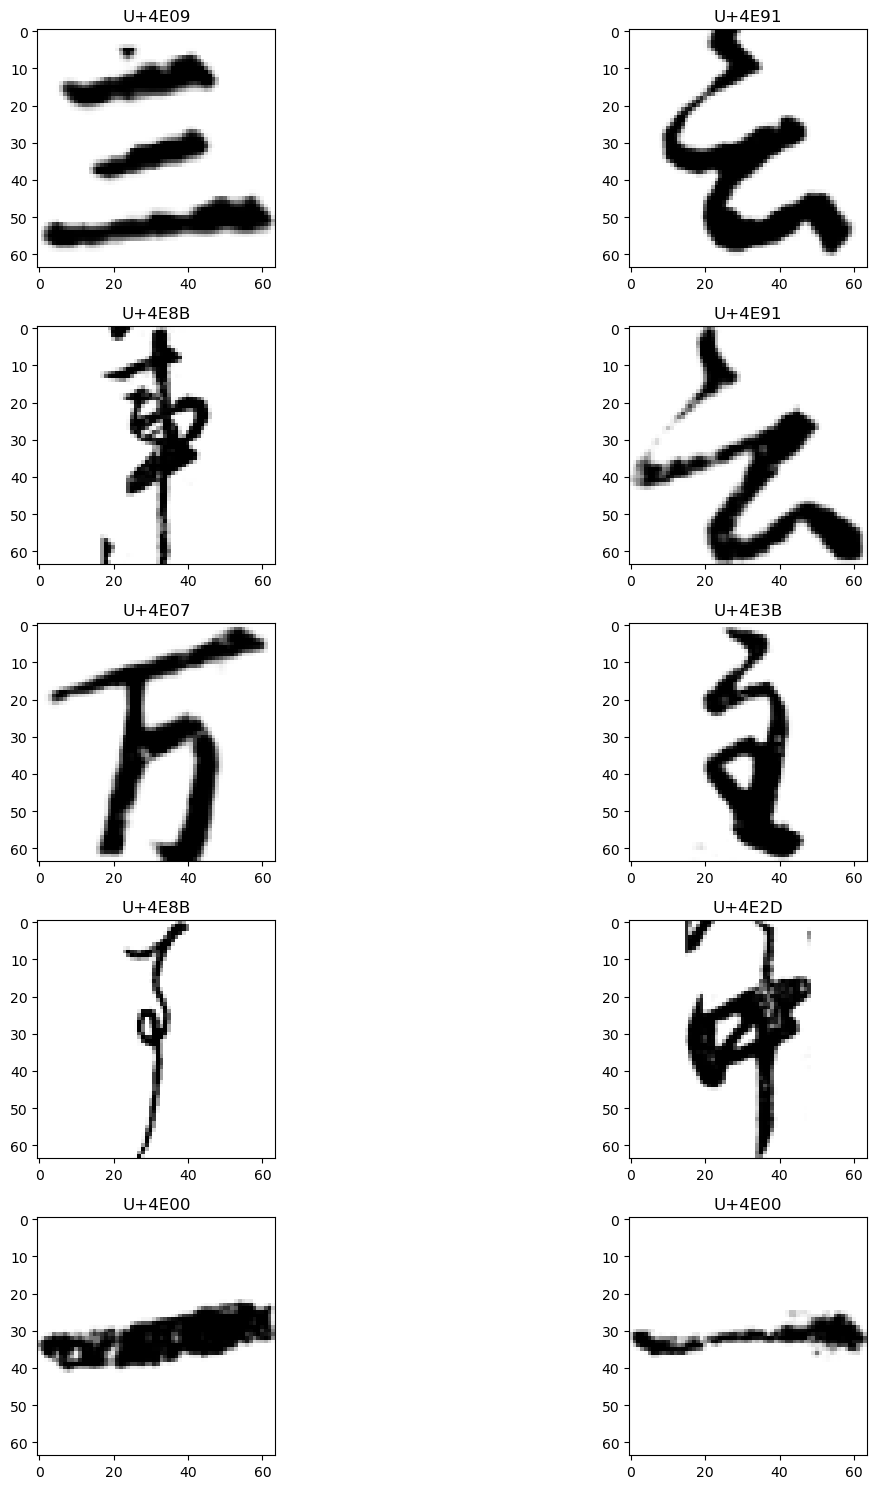

In [3]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l], cmap='Greys')
        ax[i,j].set_title(Z[l])
        
        
plt.tight_layout()

In [4]:
len(np.unique(Z))

19

In [5]:
le=LabelEncoder()


Y=le.fit_transform(Z)


Y=to_categorical(Y,len(np.unique(Z)))


X=np.array(X)


X=X/255


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding= 'Same', activation='relu', input_shape = (64,64, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size= (3,3), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(np.unique(Z)), activation="softmax"))

2023-05-17 13:37:24.087988: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-17 13:37:24.088071: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-17 13:37:24.088100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (108bb72cdfce): /proc/driver/nvidia/version does not exist
2023-05-17 13:37:24.088553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
batch_size=200
epochs=3

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,factor=0.1)

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

#datagen.fit(x_train.reshape(10500, 64, 64, 1))

In [10]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        6240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 96)         0

In [12]:
History = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/3
52/52 [==============================] - 24s 451ms/step - loss: 1.0826 - accuracy: 0.7136 - val_loss: 0.4250 - val_accuracy: 0.8769
Epoch 2/3
52/52 [==============================] - 24s 470ms/step - loss: 0.2616 - accuracy: 0.9239 - val_loss: 0.2041 - val_accuracy: 0.9443
Epoch 3/3
52/52 [==============================] - 24s 455ms/step - loss: 0.1307 - accuracy: 0.9626 - val_loss: 0.1522 - val_accuracy: 0.9594


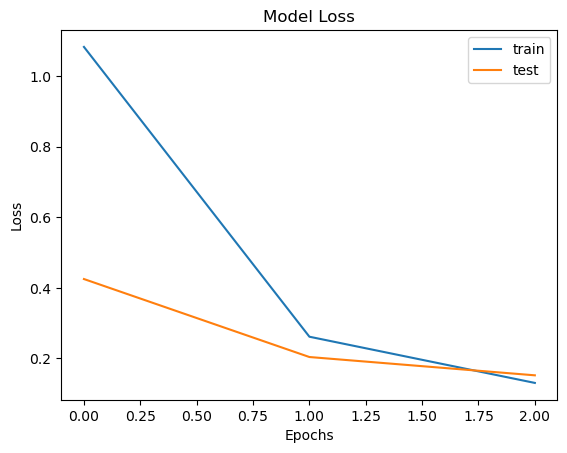

In [25]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [14]:
accuracy_history = []
accuracy_history_img = []

1/1 [==============================] - 0s 107ms/step
Predicted class: 10
Predicted class probability: 96.35957479476929 %
[[1.7983862e-07 6.4473031e-03 2.1549940e-06 8.3118374e-04 1.6531709e-04
  4.3593850e-08 8.3720834e-06 1.9368032e-07 6.3701592e-08 3.7678168e-05
  9.6359575e-01 2.1107448e-03 2.3646200e-02 9.4597553e-06 1.0983241e-04
  5.7631161e-04 1.9881281e-03 4.1495955e-06 4.6681685e-04]]


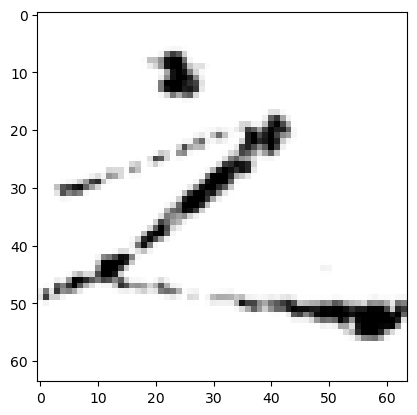

In [15]:
from matplotlib import pyplot


results = model.evaluate(x_test, y_test)
image_number = 2172
new_image = tf.expand_dims(x_test[image_number], 0)
predictions = model.predict(new_image)
predicted_class_index = predictions.argmax(axis=-1)[0]
predicted_class_probability = predictions[0][predicted_class_index]
print('Predicted class:', predicted_class_index)
print('Predicted class probability:', predicted_class_probability*100, "%")
print(predictions)
accuracy_history.append(predicted_class_probability*100)
accuracy_history_img.append(image_number)

pyplot.imshow(x_test[image_number], cmap='Greys')
#print(kanji(y_test[image_number]))


In [23]:
import webscraping

class_prediction = 10
print("Code: ", np.unique(Z)[class_prediction])
print(kanji(np.unique(Z)[class_prediction]))
webscraping.get_meaning(kanji(np.unique(Z)[class_prediction]))

Code:  U+4E4B
之

of, 
this



In [17]:
import matplotlib.pyplot as plt
accuracy_history = tuple()

def save_and_display_accuracyJup(kanji, new_accuracy):

    global accuracy_history
    accuracy_history += (kanji, new_accuracy)
    #kanjis = accuracy_history[::2]  
    accuracies = accuracy_history[1::2]  

    print(accuracy_history)
    plt.plot(accuracies)
    plt.title('Skill Rating')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Kanjis')
    plt.show()

In [18]:
def display_kanji_accuracy(kanjiS):
    global accuracy_history
    
    sign = kanji(kanjiS)

    kanjis = accuracy_history[::2]
    accuracies = accuracy_history[1::2]
    
    print(accuracy_history)
    print("Ke-Mon")
    
    indices = [i for i, k in enumerate(kanjis) if k == kanjiS]
    
    if len(indices) == 0:
        print(f"No ratings found for {kanji}.")
        return
    
    kanji_accuracies = [accuracies[i] for i in indices]
    
    plt.plot(kanji_accuracies)
    plt.title(sign + '- Skill Rating')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Occurrences')
    plt.show()

1/1 [==============================] - 0s 24ms/step
Predicted class: 0
Predicted class probability: 99.83787536621094 %
-----------------------------
U+4E00
99.83787536621094
-----------------------------
('U+4E00', 99.83787536621094)


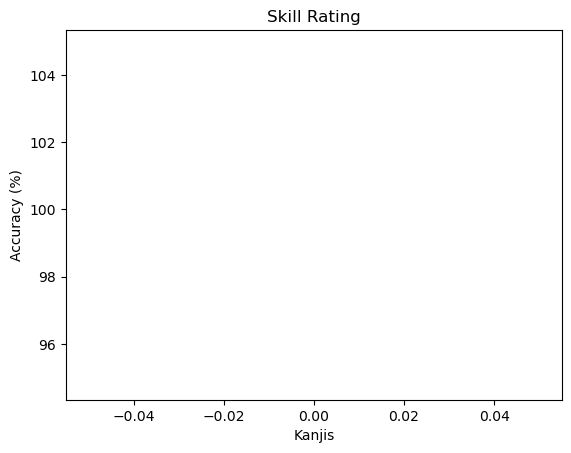

1/1 [==============================] - 0s 24ms/step
Predicted class: 3
Predicted class probability: 99.98769760131836 %
-----------------------------
U+4E09
99.98769760131836
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836)


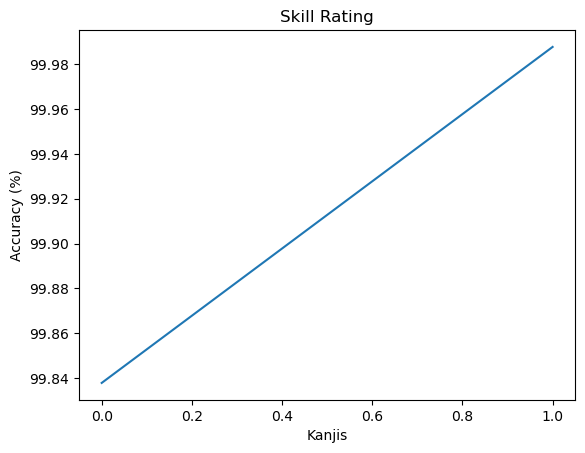

1/1 [==============================] - 0s 35ms/step
Predicted class: 6
Predicted class probability: 98.94430637359619 %
-----------------------------
U+4E0D
98.94430637359619
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619)


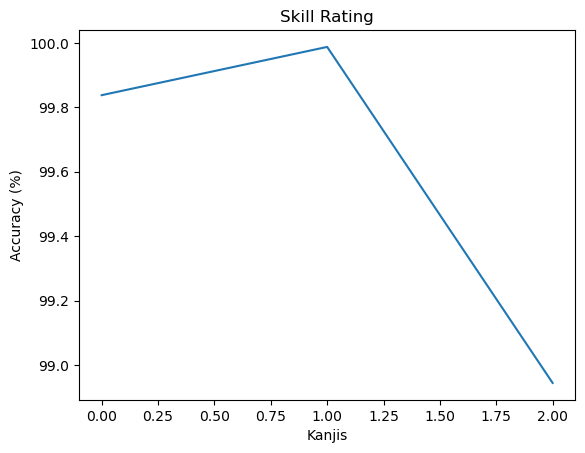

1/1 [==============================] - 0s 22ms/step
Predicted class: 13
Predicted class probability: 99.09936785697937 %
-----------------------------
U+4E8B
99.09936785697937
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937)


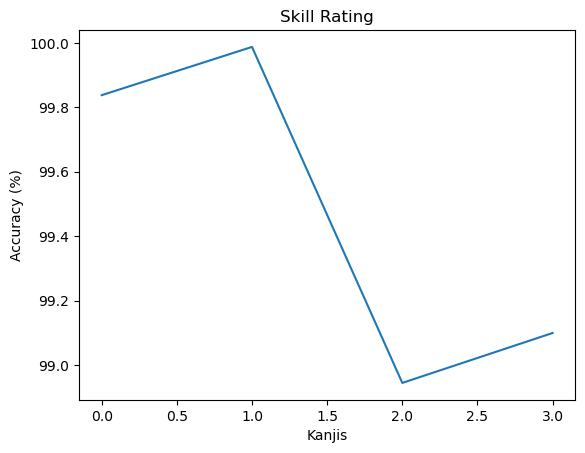

1/1 [==============================] - 0s 23ms/step
Predicted class: 14
Predicted class probability: 93.7128484249115 %
-----------------------------
U+4E8C
93.7128484249115
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115)


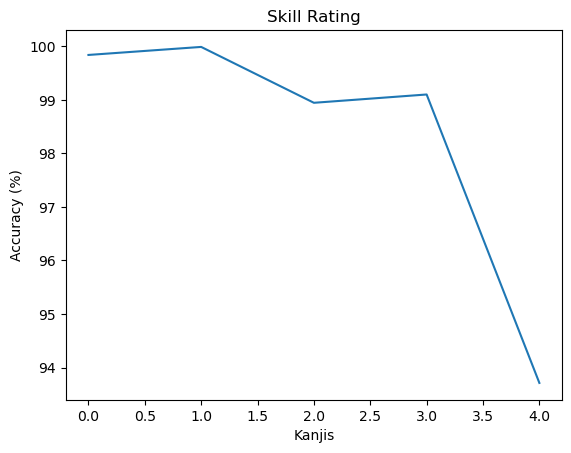

1/1 [==============================] - 0s 23ms/step
Predicted class: 14
Predicted class probability: 94.75677609443665 %
-----------------------------
U+4E8C
94.75677609443665
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665)


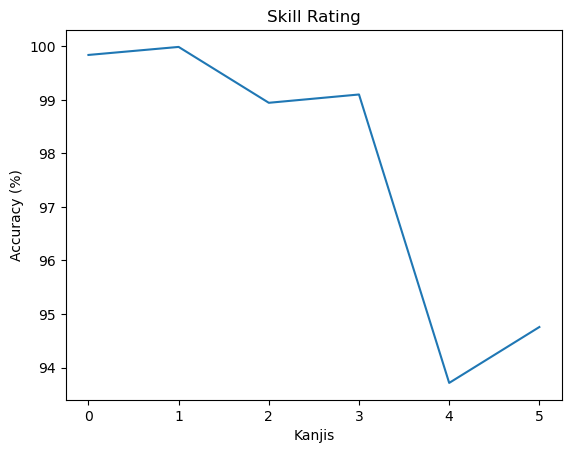

1/1 [==============================] - 0s 43ms/step
Predicted class: 7
Predicted class probability: 99.95362758636475 %
-----------------------------
U+4E16
99.95362758636475
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475)


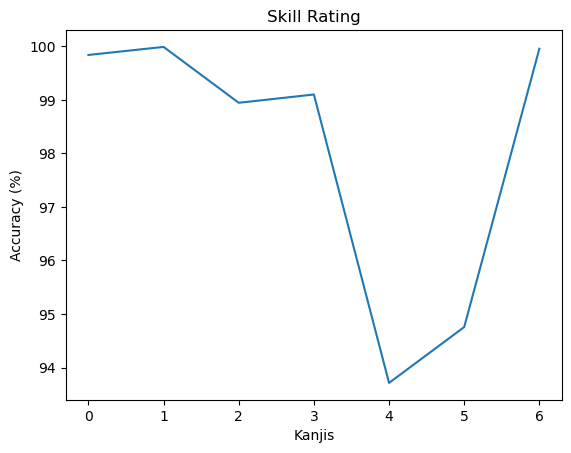

1/1 [==============================] - 0s 25ms/step
Predicted class: 12
Predicted class probability: 70.7309365272522 %
-----------------------------
U+4E5F
70.7309365272522
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522)


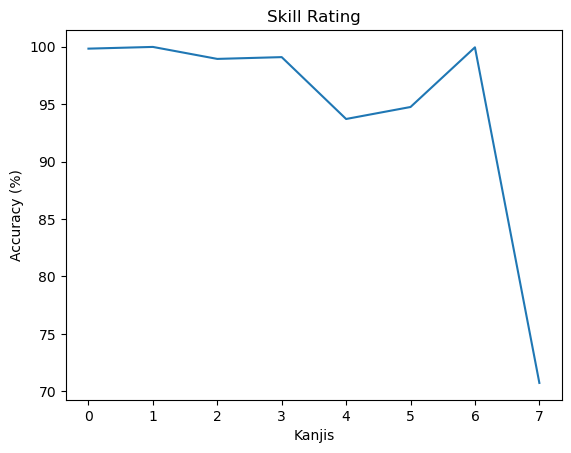

1/1 [==============================] - 0s 21ms/step
Predicted class: 4
Predicted class probability: 99.13327097892761 %
-----------------------------
U+4E0A
99.13327097892761
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761)


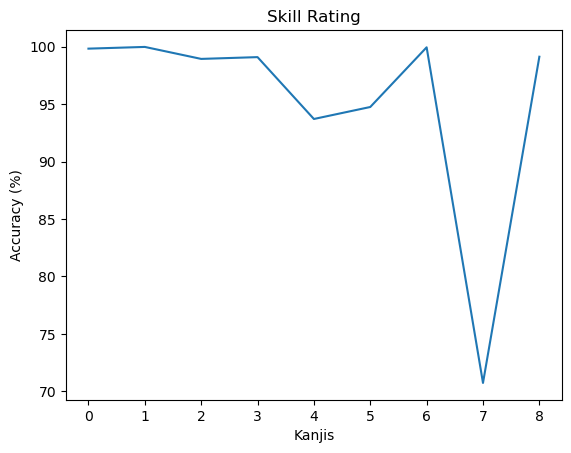

1/1 [==============================] - 0s 21ms/step
Predicted class: 10
Predicted class probability: 99.8884379863739 %
-----------------------------
U+4E4B
99.8884379863739
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739)


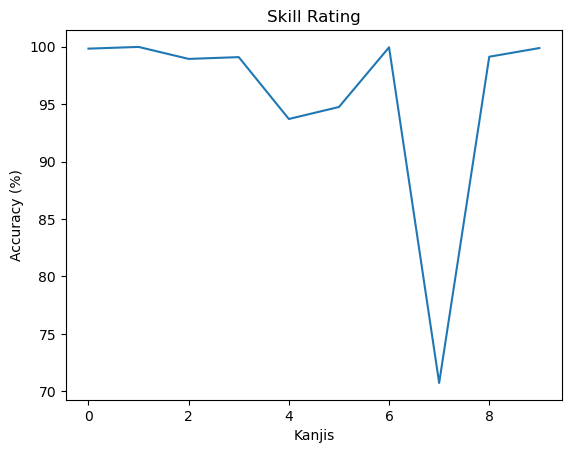

1/1 [==============================] - 0s 23ms/step
Predicted class: 0
Predicted class probability: 99.10733103752136 %
-----------------------------
U+4E00
99.10733103752136
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136)


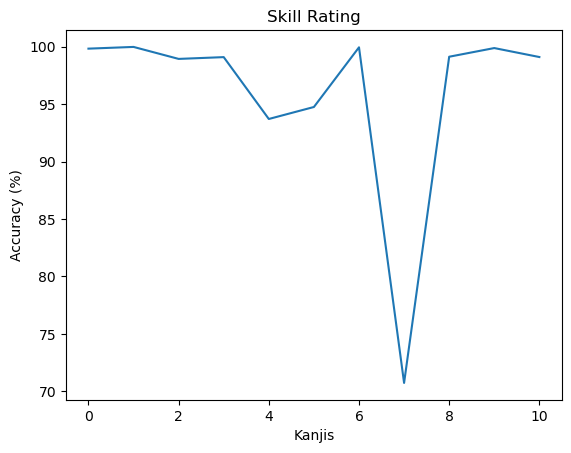

1/1 [==============================] - 0s 24ms/step
Predicted class: 15
Predicted class probability: 99.94992017745972 %
-----------------------------
U+4E91
99.94992017745972
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972)


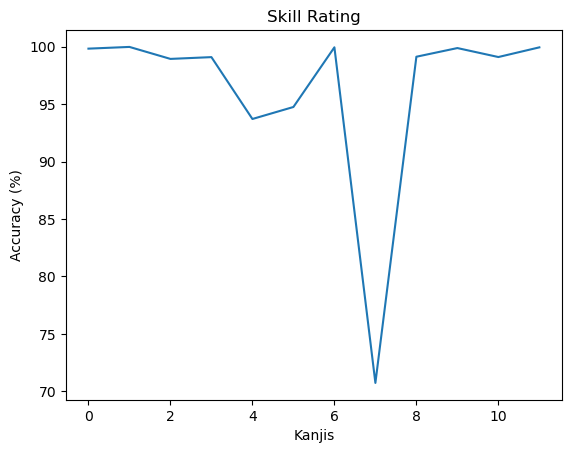

1/1 [==============================] - 0s 25ms/step
Predicted class: 14
Predicted class probability: 98.59781265258789 %
-----------------------------
U+4E8C
98.59781265258789
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789)


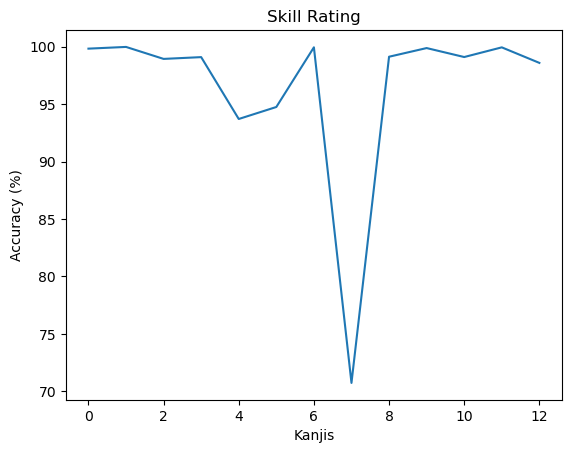

1/1 [==============================] - 0s 25ms/step
Predicted class: 0
Predicted class probability: 99.02631044387817 %
-----------------------------
U+4E00
99.02631044387817
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817)


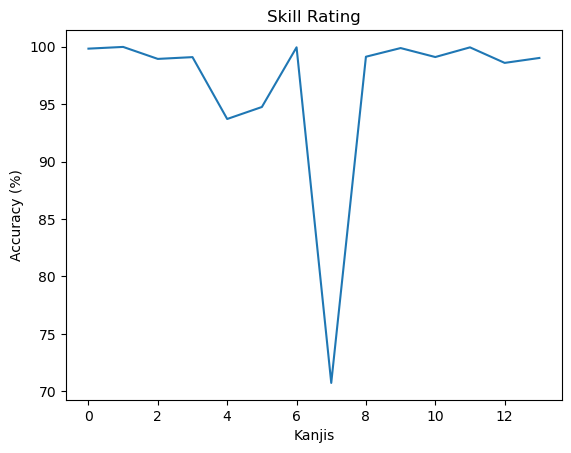

1/1 [==============================] - 0s 22ms/step
Predicted class: 14
Predicted class probability: 99.25442934036255 %
-----------------------------
U+4E8C
99.25442934036255
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255)


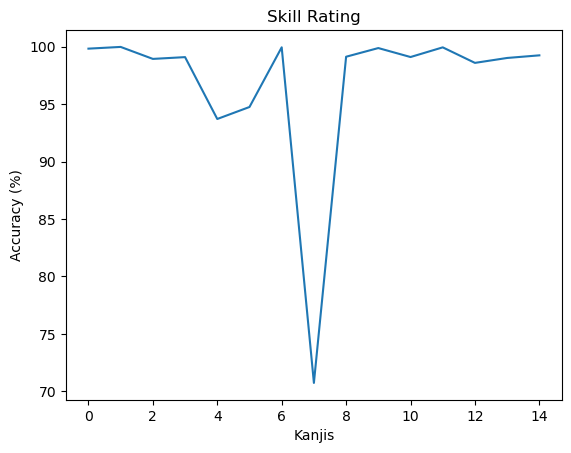

1/1 [==============================] - 0s 21ms/step
Predicted class: 16
Predicted class probability: 99.6616542339325 %
-----------------------------
U+4E94
99.6616542339325
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325)


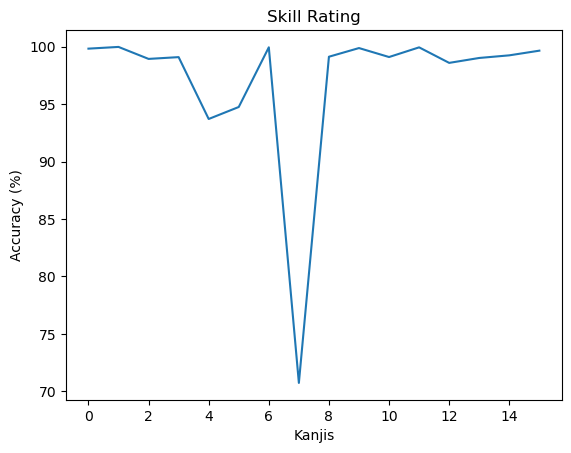

1/1 [==============================] - 0s 24ms/step
Predicted class: 0
Predicted class probability: 99.73481893539429 %
-----------------------------
U+4E00
99.73481893539429
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429)


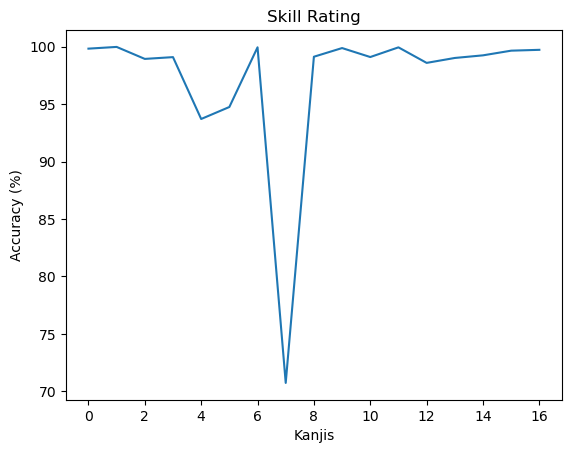

1/1 [==============================] - 0s 23ms/step
Predicted class: 13
Predicted class probability: 99.37542080879211 %
-----------------------------
U+4E8B
99.37542080879211
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211)


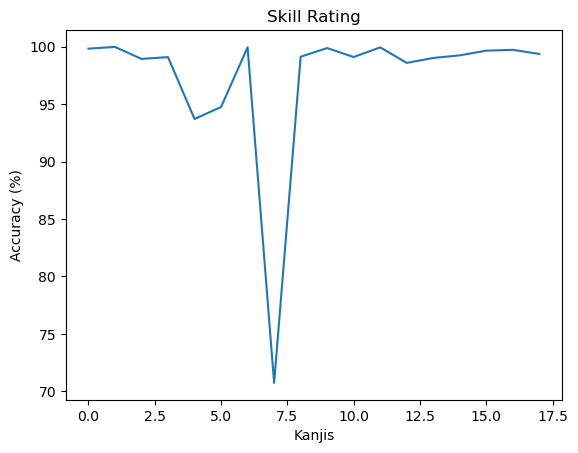

1/1 [==============================] - 0s 23ms/step
Predicted class: 5
Predicted class probability: 99.96997117996216 %
-----------------------------
U+4E0B
99.96997117996216
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216)


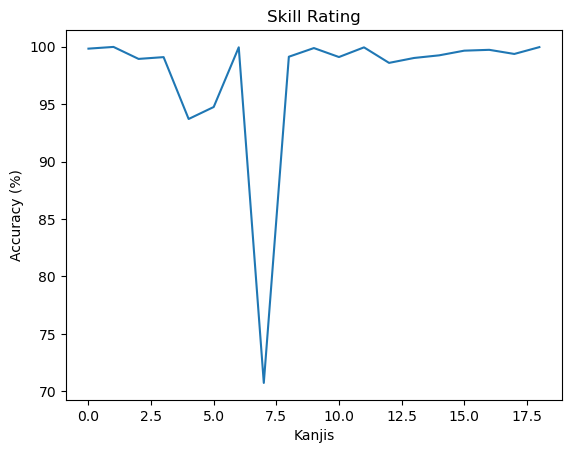

1/1 [==============================] - 0s 23ms/step
Predicted class: 18
Predicted class probability: 99.99998807907104 %
-----------------------------
U+4EBA
99.99998807907104
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104)


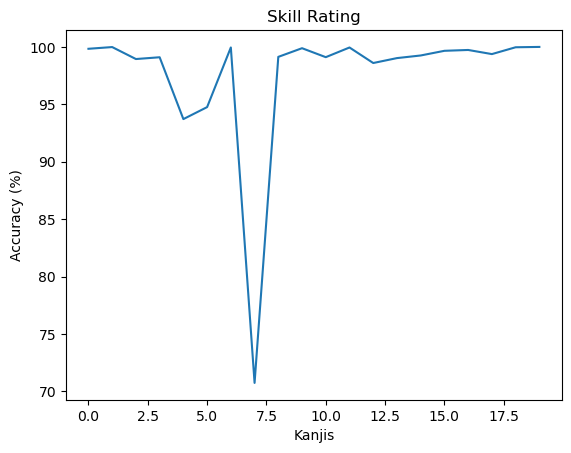

1/1 [==============================] - 0s 30ms/step
Predicted class: 12
Predicted class probability: 91.90340042114258 %
-----------------------------
U+4E5F
91.90340042114258
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258)


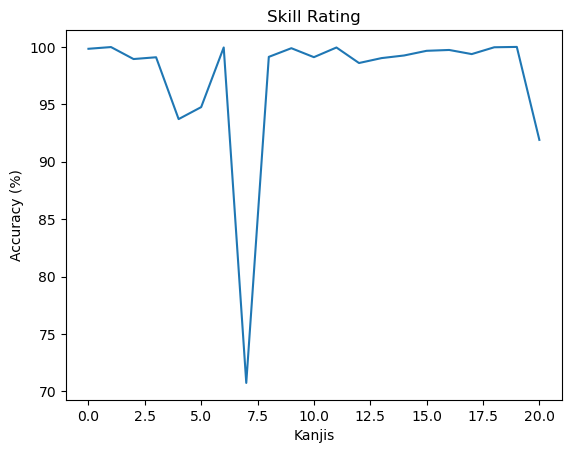

1/1 [==============================] - 0s 21ms/step
Predicted class: 14
Predicted class probability: 99.88644123077393 %
-----------------------------
U+4E8C
99.88644123077393
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393)


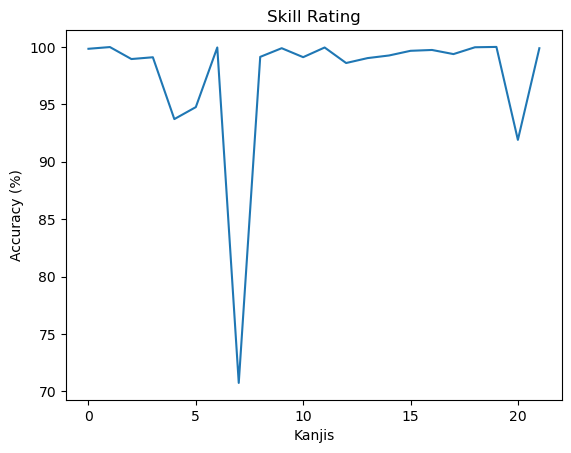

1/1 [==============================] - 0s 24ms/step
Predicted class: 10
Predicted class probability: 82.16266632080078 %
-----------------------------
U+4E4B
82.16266632080078
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078)


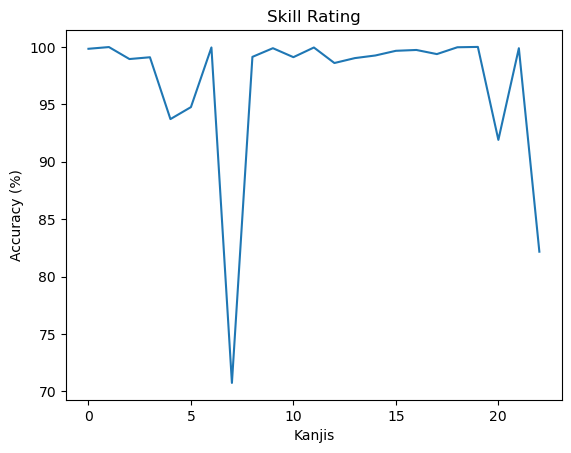

1/1 [==============================] - 0s 37ms/step
Predicted class: 0
Predicted class probability: 98.4659194946289 %
-----------------------------
U+4E00
98.4659194946289
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289)


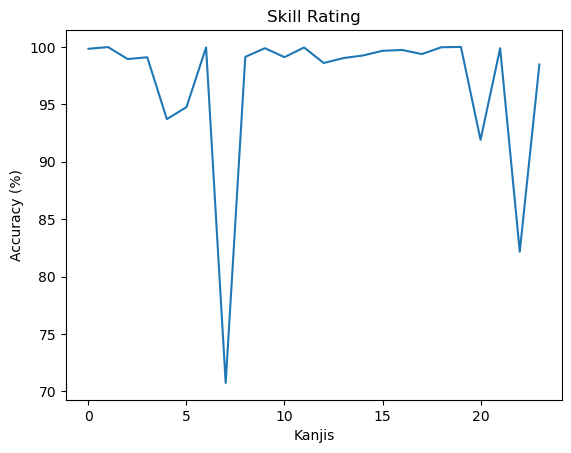

1/1 [==============================] - 0s 23ms/step
Predicted class: 0
Predicted class probability: 99.73605275154114 %
-----------------------------
U+4E00
99.73605275154114
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114)


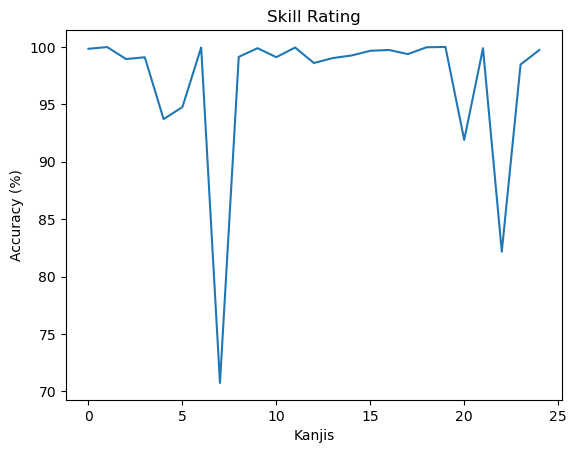

1/1 [==============================] - 0s 22ms/step
Predicted class: 13
Predicted class probability: 97.12457656860352 %
-----------------------------
U+4E8B
97.12457656860352
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352)


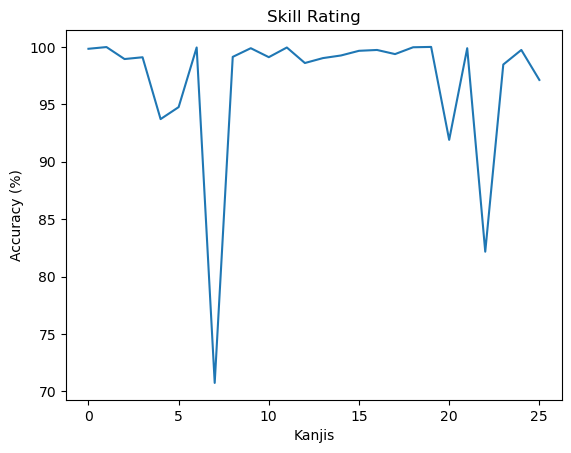

1/1 [==============================] - 0s 25ms/step
Predicted class: 4
Predicted class probability: 99.99064207077026 %
-----------------------------
U+4E0A
99.99064207077026
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026)


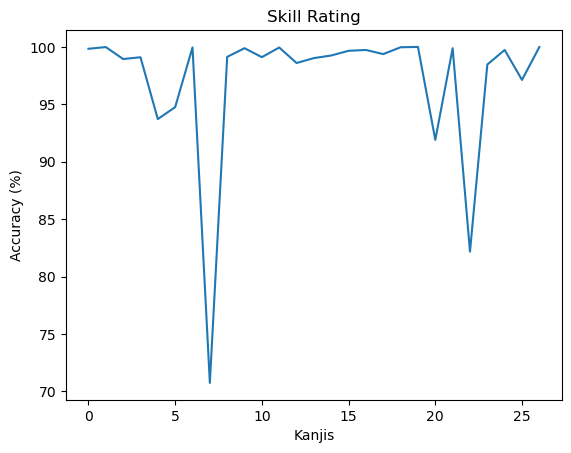

1/1 [==============================] - 0s 28ms/step
Predicted class: 14
Predicted class probability: 86.5627646446228 %
-----------------------------
U+4E8C
86.5627646446228
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627

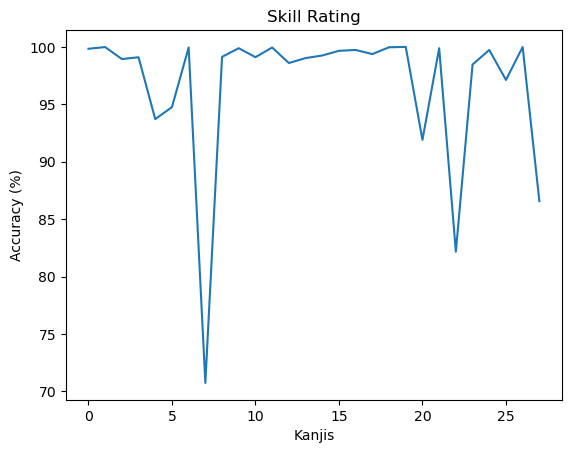

1/1 [==============================] - 0s 24ms/step
Predicted class: 16
Predicted class probability: 96.06868624687195 %
-----------------------------
U+4E94
96.06868624687195
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

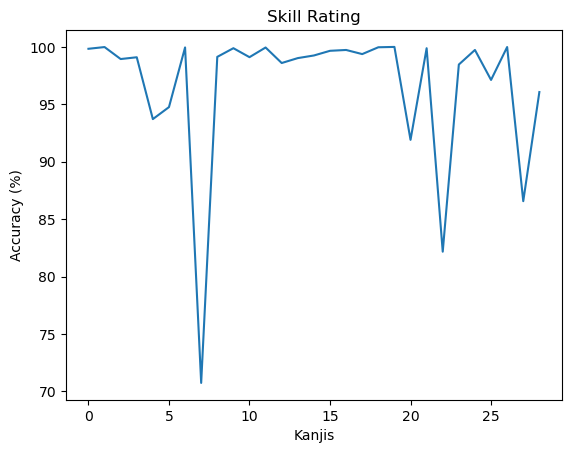

1/1 [==============================] - 0s 29ms/step
Predicted class: 0
Predicted class probability: 99.93718266487122 %
-----------------------------
U+4E00
99.93718266487122
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

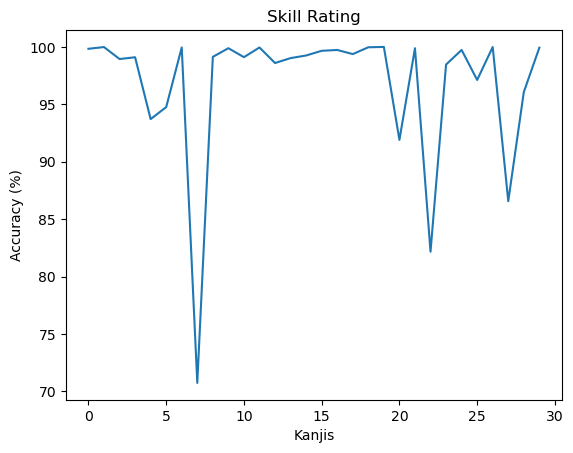

1/1 [==============================] - 0s 23ms/step
Predicted class: 12
Predicted class probability: 99.94081258773804 %
-----------------------------
U+4E5F
99.94081258773804
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

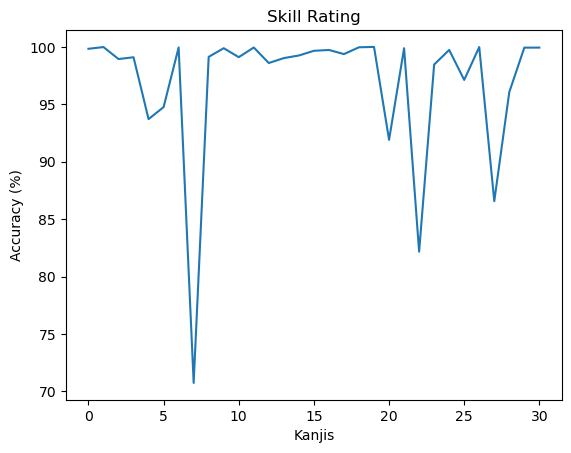

1/1 [==============================] - 0s 23ms/step
Predicted class: 15
Predicted class probability: 99.84297156333923 %
-----------------------------
U+4E91
99.84297156333923
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

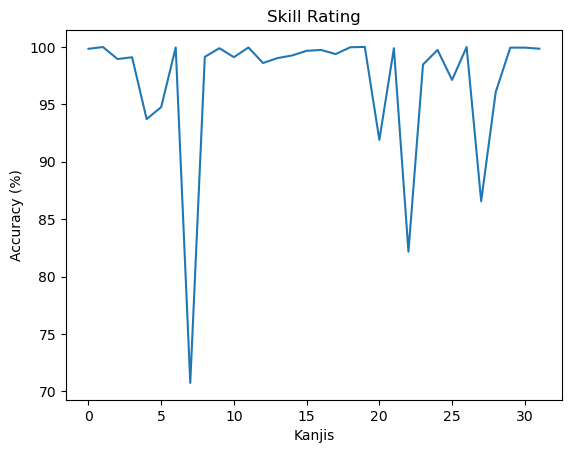

1/1 [==============================] - 0s 23ms/step
Predicted class: 3
Predicted class probability: 99.42044615745544 %
-----------------------------
U+4E09
99.42044615745544
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

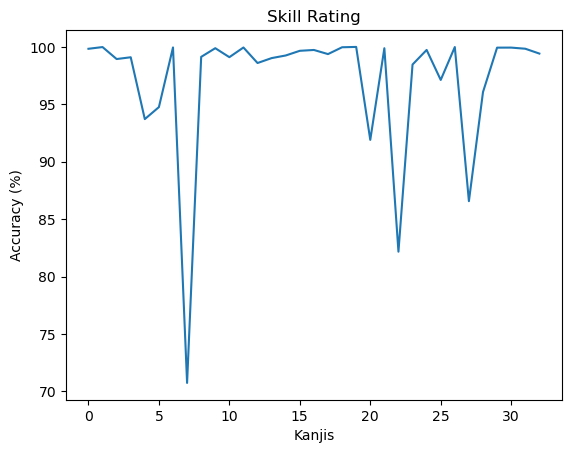

1/1 [==============================] - 0s 21ms/step
Predicted class: 13
Predicted class probability: 99.92592930793762 %
-----------------------------
U+4E8B
99.92592930793762
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

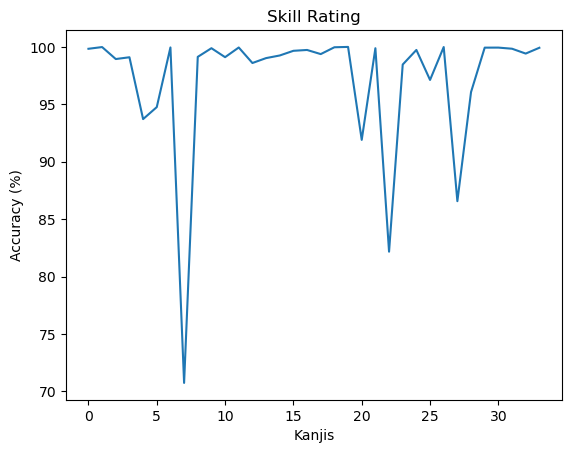

1/1 [==============================] - 0s 28ms/step
Predicted class: 0
Predicted class probability: 78.36265563964844 %
-----------------------------
U+4E00
78.36265563964844
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

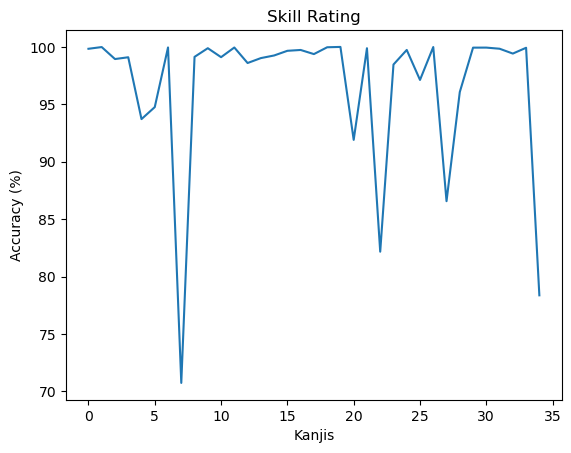

1/1 [==============================] - 0s 27ms/step
Predicted class: 12
Predicted class probability: 99.99833106994629 %
-----------------------------
U+4E5F
99.99833106994629
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

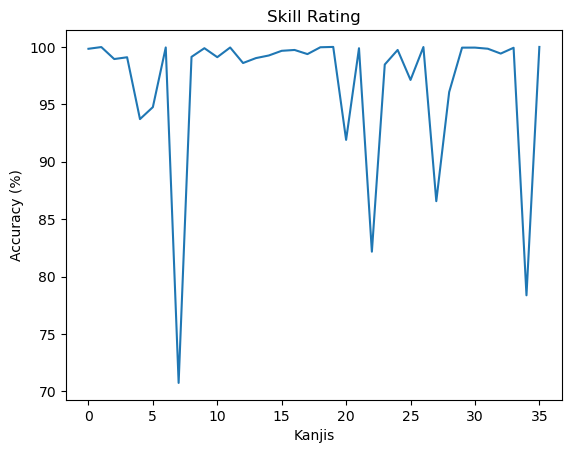

1/1 [==============================] - 0s 23ms/step
Predicted class: 13
Predicted class probability: 99.90814924240112 %
-----------------------------
U+4E8B
99.90814924240112
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

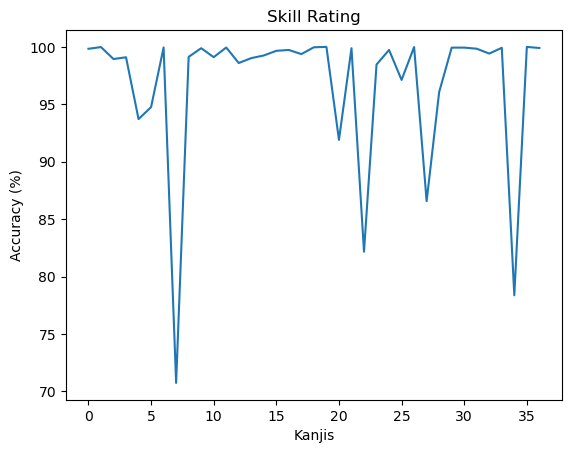

1/1 [==============================] - 0s 25ms/step
Predicted class: 3
Predicted class probability: 93.70802044868469 %
-----------------------------
U+4E09
93.70802044868469
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

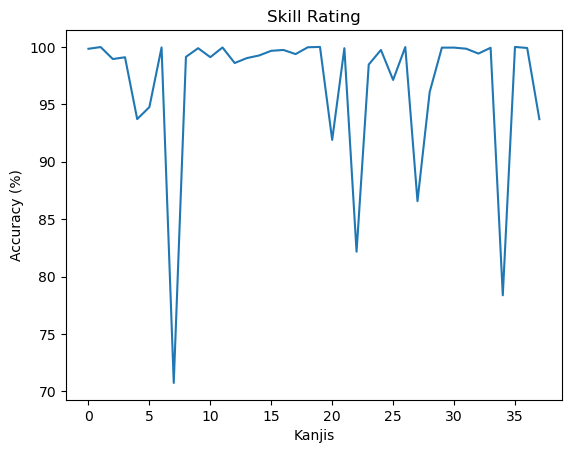

1/1 [==============================] - 0s 25ms/step
Predicted class: 18
Predicted class probability: 99.99996423721313 %
-----------------------------
U+4EBA
99.99996423721313
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

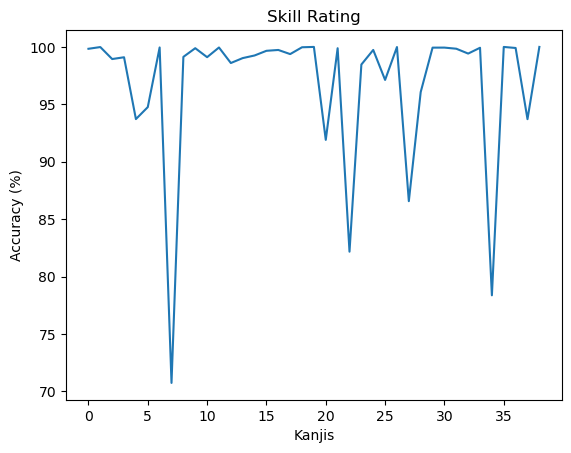

1/1 [==============================] - 0s 23ms/step
Predicted class: 15
Predicted class probability: 99.99923706054688 %
-----------------------------
U+4E91
99.99923706054688
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

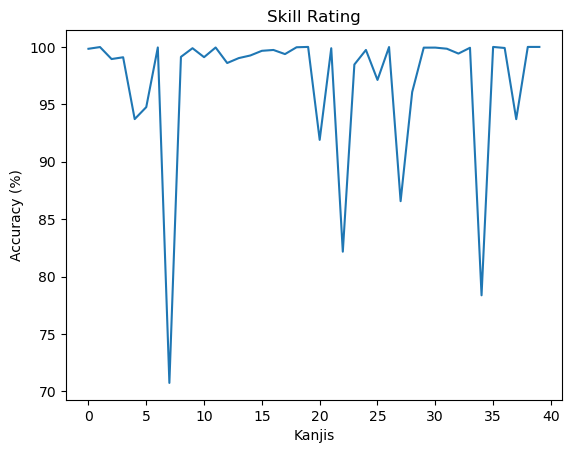

1/1 [==============================] - 0s 22ms/step
Predicted class: 13
Predicted class probability: 98.79187941551208 %
-----------------------------
U+4E8B
98.79187941551208
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

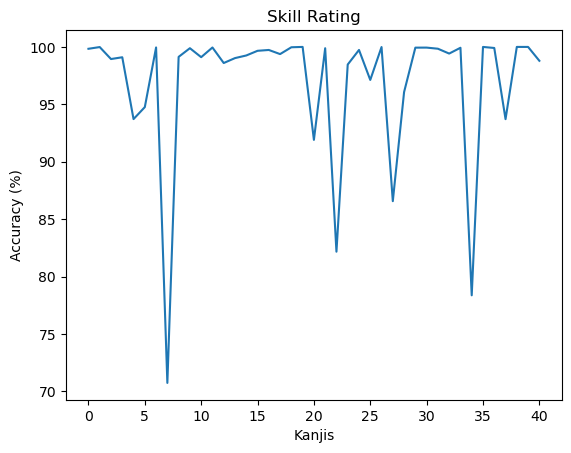

1/1 [==============================] - 0s 32ms/step
Predicted class: 15
Predicted class probability: 99.99815225601196 %
-----------------------------
U+4E91
99.99815225601196
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

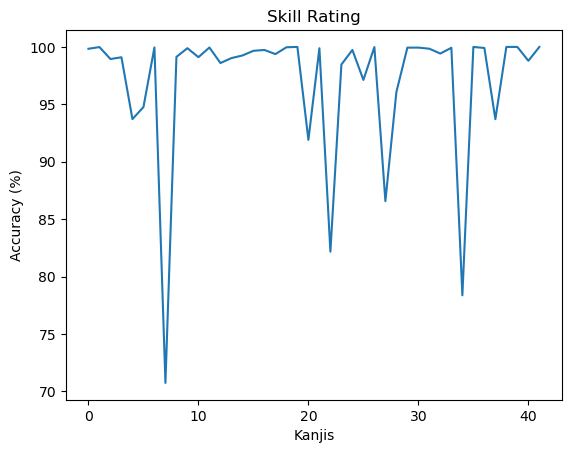

1/1 [==============================] - 0s 22ms/step
Predicted class: 13
Predicted class probability: 99.79667663574219 %
-----------------------------
U+4E8B
99.79667663574219
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

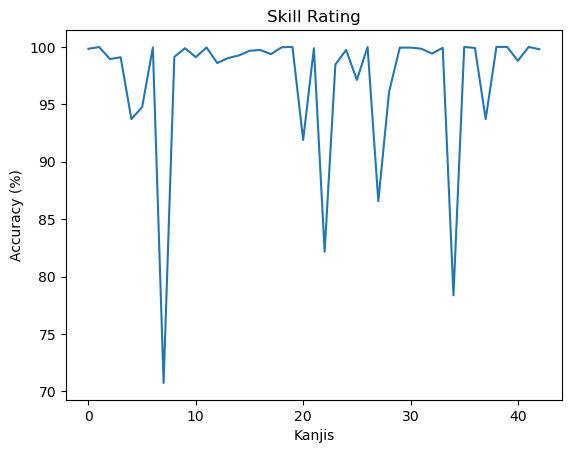

1/1 [==============================] - 0s 33ms/step
Predicted class: 15
Predicted class probability: 99.99971389770508 %
-----------------------------
U+4E91
99.99971389770508
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

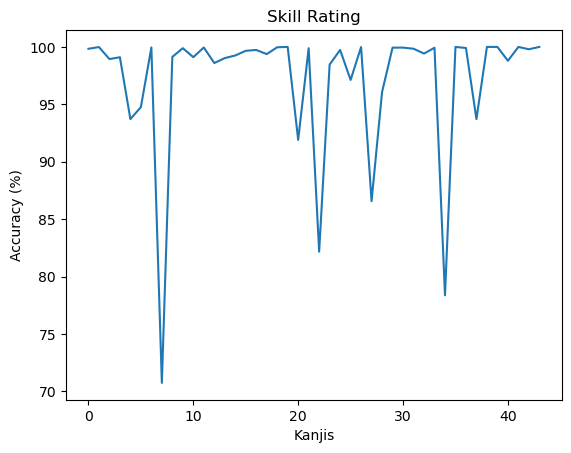

1/1 [==============================] - 0s 23ms/step
Predicted class: 9
Predicted class probability: 85.3082537651062 %
-----------------------------
U+4E3B
85.3082537651062
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

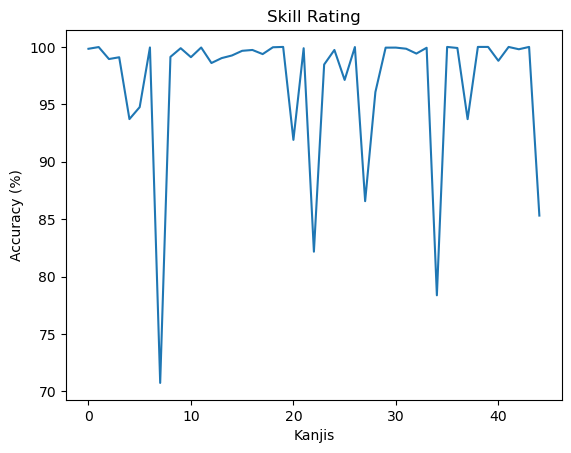

1/1 [==============================] - 0s 86ms/step
Predicted class: 3
Predicted class probability: 99.7452437877655 %
-----------------------------
U+4E09
99.7452437877655
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

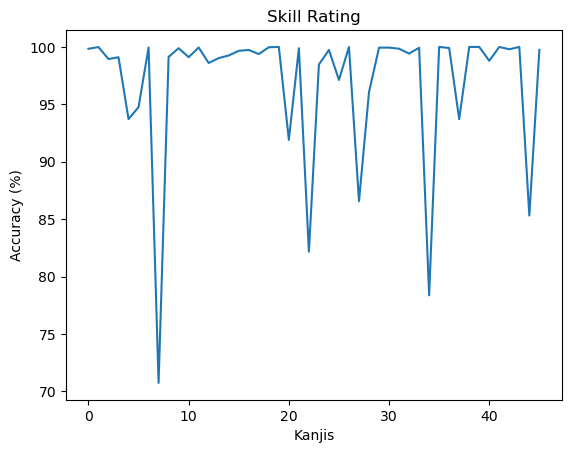

1/1 [==============================] - 0s 41ms/step
Predicted class: 0
Predicted class probability: 98.82538318634033 %
-----------------------------
U+4E00
98.82538318634033
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

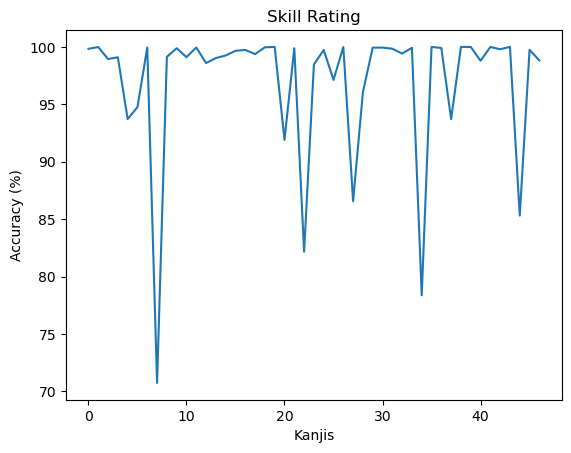

1/1 [==============================] - 0s 23ms/step
Predicted class: 15
Predicted class probability: 99.99992847442627 %
-----------------------------
U+4E91
99.99992847442627
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

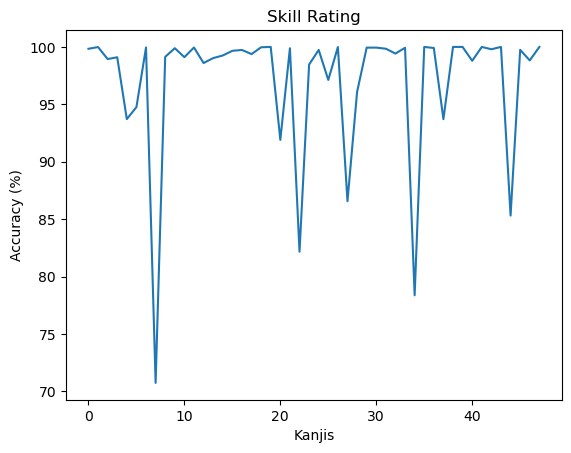

1/1 [==============================] - 0s 21ms/step
Predicted class: 0
Predicted class probability: 98.27067852020264 %
-----------------------------
U+4E00
98.27067852020264
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

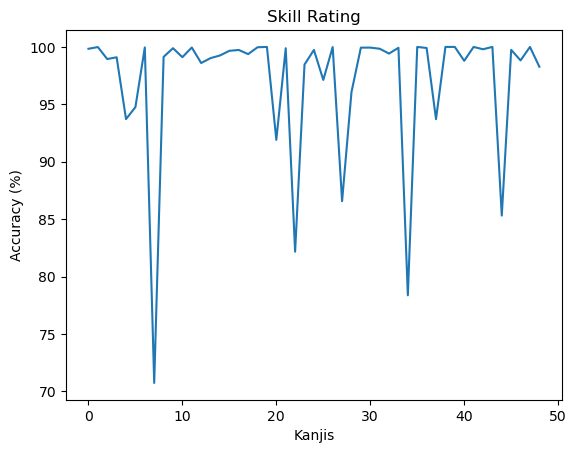

1/1 [==============================] - 0s 35ms/step
Predicted class: 3
Predicted class probability: 99.05152320861816 %
-----------------------------
U+4E09
99.05152320861816
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

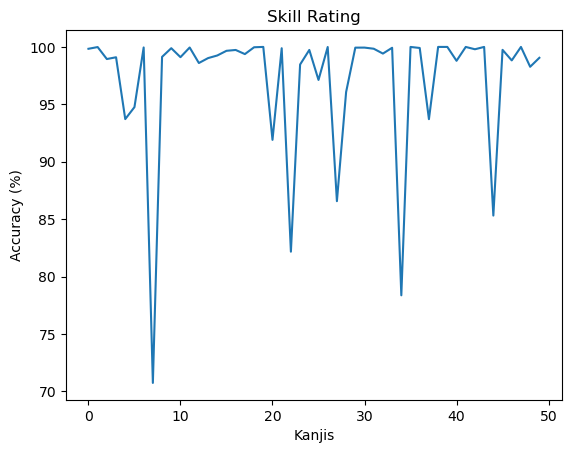

1/1 [==============================] - 0s 28ms/step
Predicted class: 12
Predicted class probability: 99.76181387901306 %
-----------------------------
U+4E5F
99.76181387901306
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

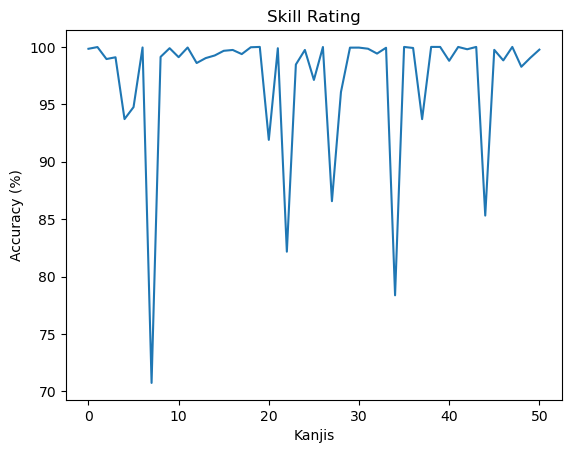

1/1 [==============================] - 0s 21ms/step
Predicted class: 5
Predicted class probability: 99.56817626953125 %
-----------------------------
U+4E0B
99.56817626953125
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

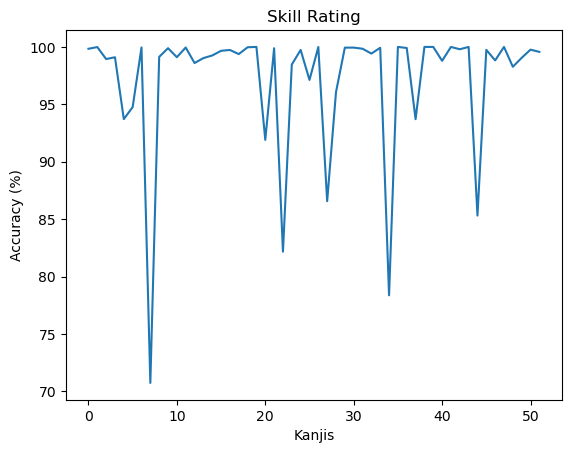

1/1 [==============================] - 0s 25ms/step
Predicted class: 4
Predicted class probability: 90.47699570655823 %
-----------------------------
U+4E0A
90.47699570655823
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

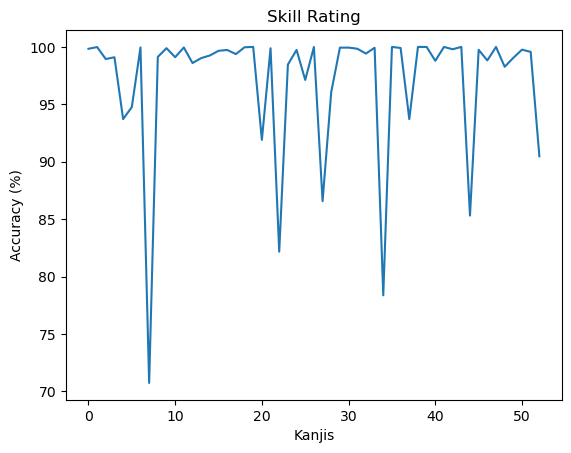

1/1 [==============================] - 0s 23ms/step
Predicted class: 13
Predicted class probability: 89.20290470123291 %
-----------------------------
U+4E8B
89.20290470123291
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

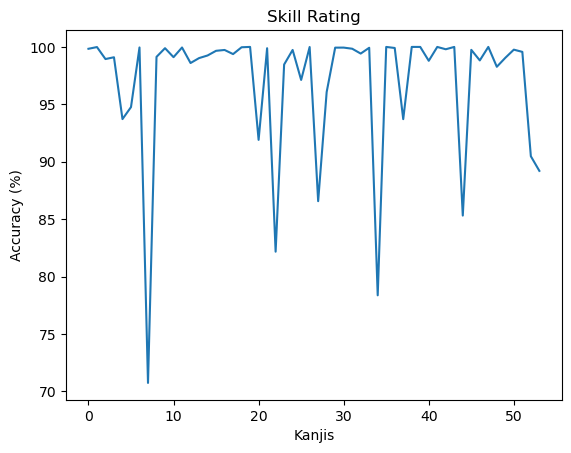

1/1 [==============================] - 0s 22ms/step
Predicted class: 4
Predicted class probability: 98.8598108291626 %
-----------------------------
U+4E0A
98.8598108291626
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

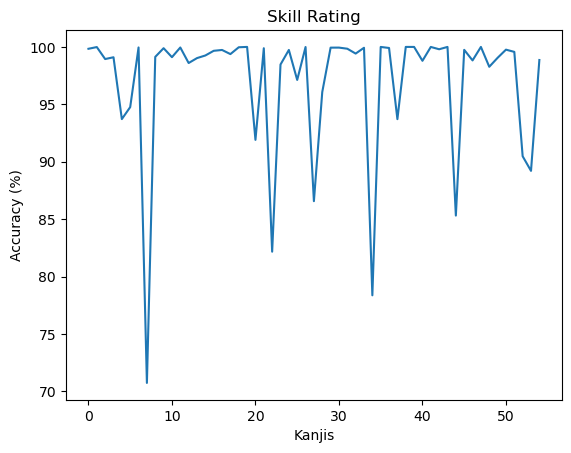

1/1 [==============================] - 0s 34ms/step
Predicted class: 15
Predicted class probability: 99.04444813728333 %
-----------------------------
U+4E91
99.04444813728333
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

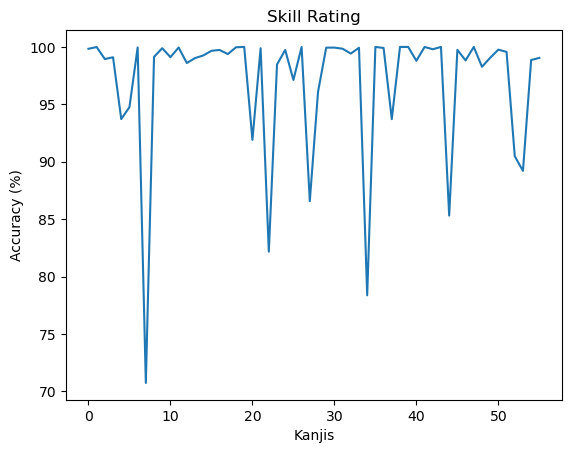

1/1 [==============================] - 0s 32ms/step
Predicted class: 4
Predicted class probability: 94.94585990905762 %
-----------------------------
U+4E0A
94.94585990905762
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

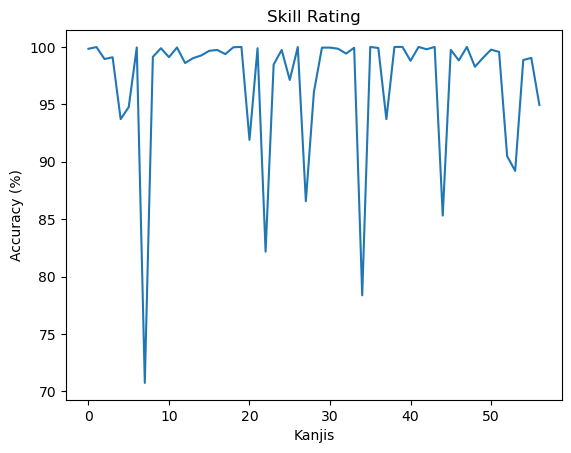

1/1 [==============================] - 0s 44ms/step
Predicted class: 0
Predicted class probability: 99.64086413383484 %
-----------------------------
U+4E00
99.64086413383484
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

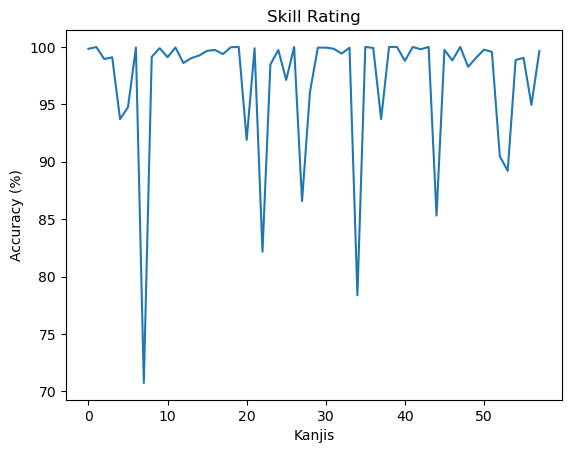

1/1 [==============================] - 0s 31ms/step
Predicted class: 0
Predicted class probability: 99.69536066055298 %
-----------------------------
U+4E00
99.69536066055298
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

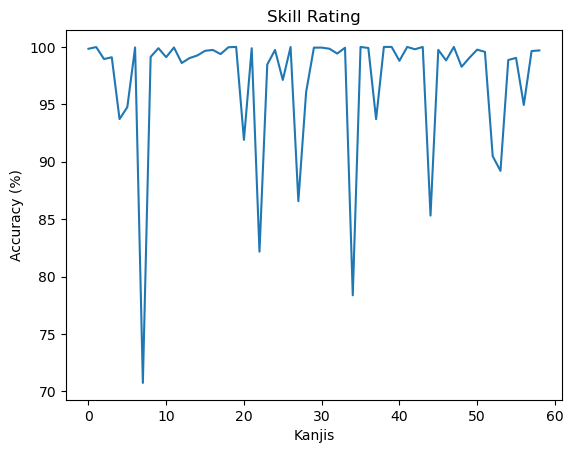

1/1 [==============================] - 0s 32ms/step
Predicted class: 0
Predicted class probability: 99.7633695602417 %
-----------------------------
U+4E00
99.7633695602417
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

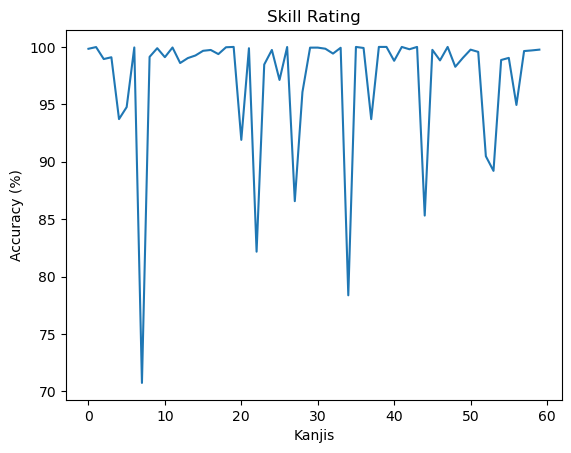

1/1 [==============================] - 0s 27ms/step
Predicted class: 8
Predicted class probability: 99.97122883796692 %
-----------------------------
U+4E2D
99.97122883796692
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

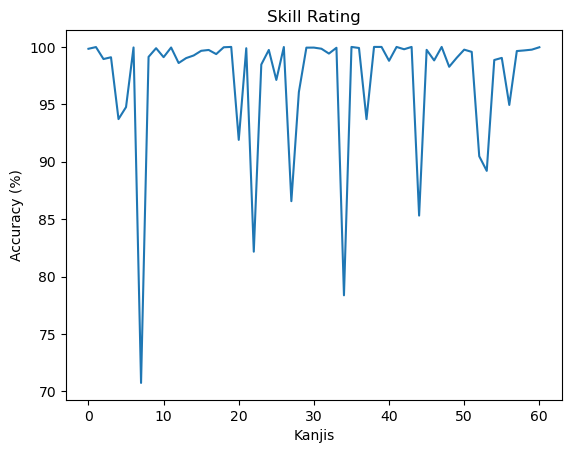

1/1 [==============================] - 0s 28ms/step
Predicted class: 4
Predicted class probability: 99.96681213378906 %
-----------------------------
U+4E0A
99.96681213378906
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

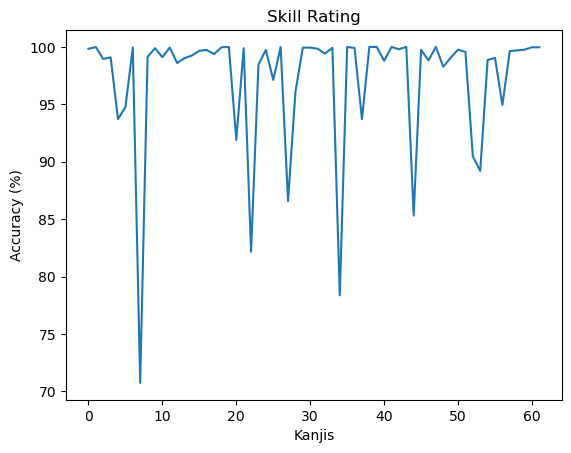

1/1 [==============================] - 0s 29ms/step
Predicted class: 18
Predicted class probability: 99.99606609344482 %
-----------------------------
U+4EBA
99.99606609344482
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

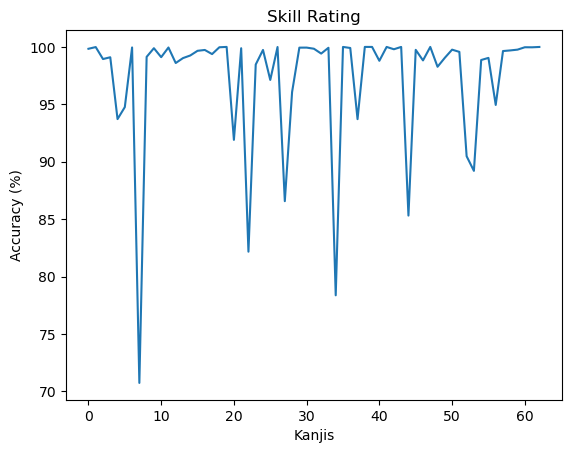

1/1 [==============================] - 0s 42ms/step
Predicted class: 18
Predicted class probability: 99.94164705276489 %
-----------------------------
U+4EBA
99.94164705276489
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

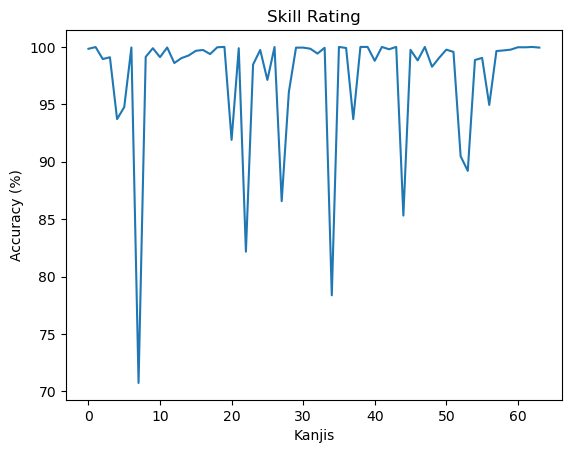

1/1 [==============================] - 0s 43ms/step
Predicted class: 13
Predicted class probability: 67.81574487686157 %
-----------------------------
U+4E8B
67.81574487686157
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

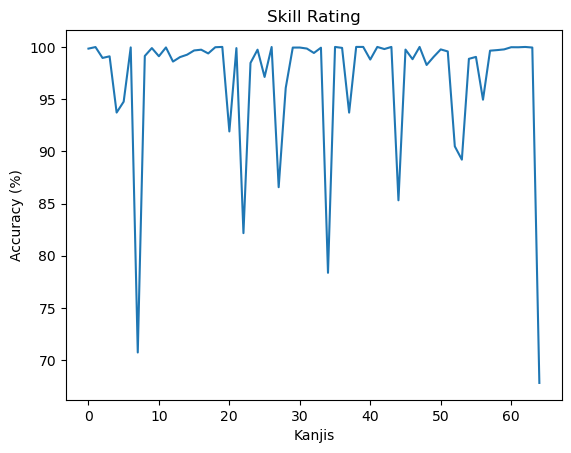

1/1 [==============================] - 0s 29ms/step
Predicted class: 16
Predicted class probability: 85.3461503982544 %
-----------------------------
U+4E94
85.3461503982544
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627

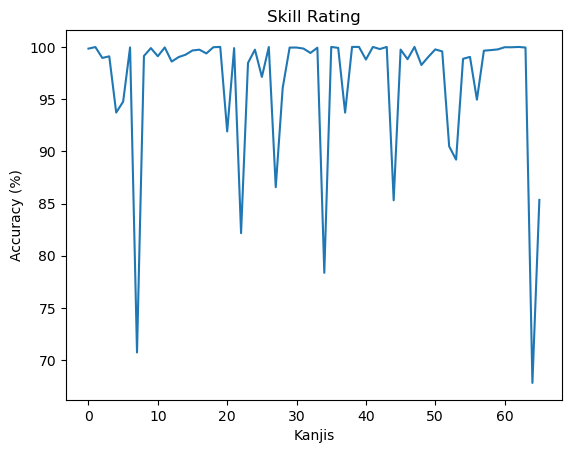

1/1 [==============================] - 0s 31ms/step
Predicted class: 15
Predicted class probability: 99.9966025352478 %
-----------------------------
U+4E91
99.9966025352478
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627

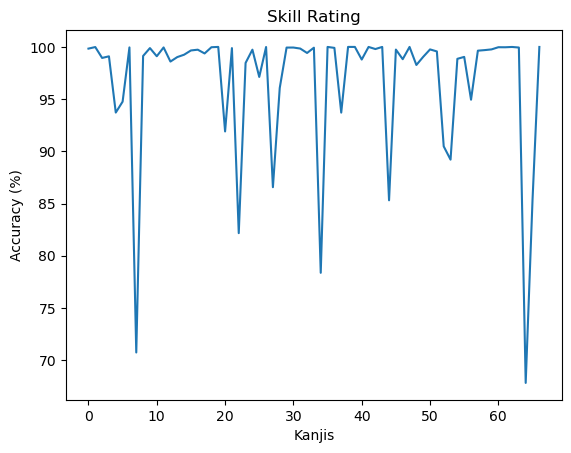

1/1 [==============================] - 0s 26ms/step
Predicted class: 13
Predicted class probability: 98.5127866268158 %
-----------------------------
U+4E8B
98.5127866268158
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627

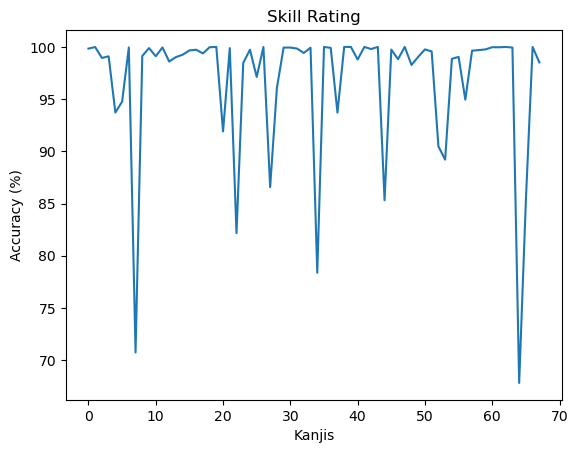

1/1 [==============================] - 0s 24ms/step
Predicted class: 10
Predicted class probability: 98.74961376190186 %
-----------------------------
U+4E4B
98.74961376190186
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

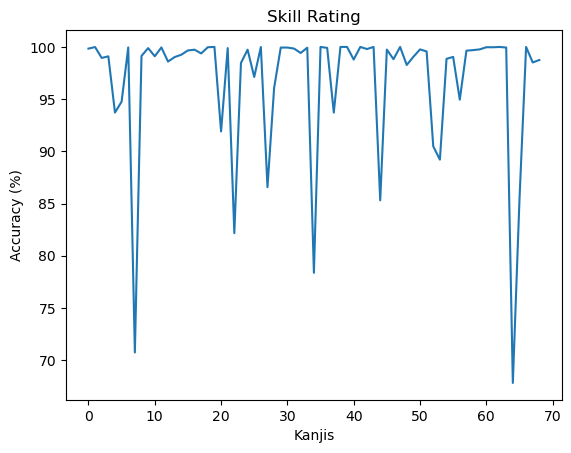

1/1 [==============================] - 0s 23ms/step
Predicted class: 18
Predicted class probability: 99.99834299087524 %
-----------------------------
U+4EBA
99.99834299087524
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

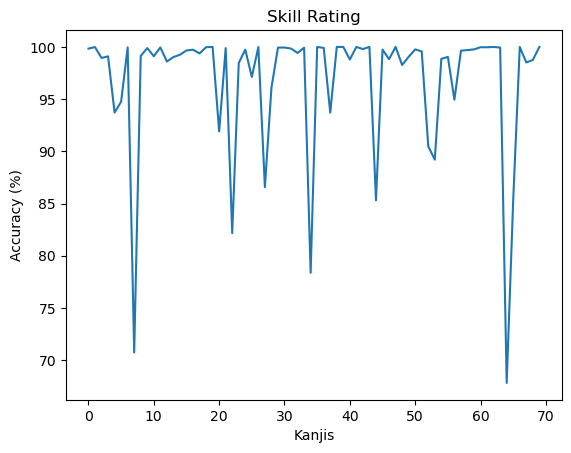

1/1 [==============================] - 0s 33ms/step
Predicted class: 0
Predicted class probability: 98.71237277984619 %
-----------------------------
U+4E00
98.71237277984619
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

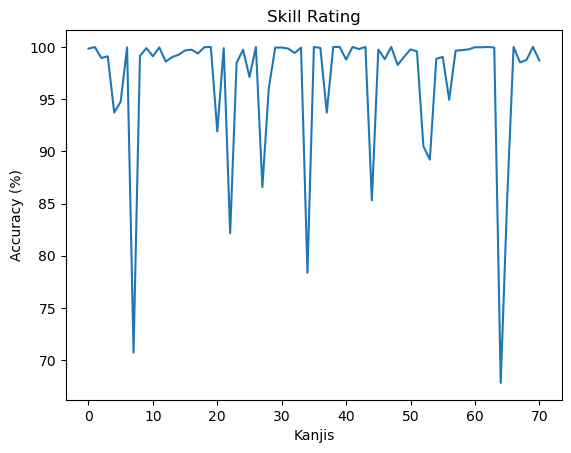

1/1 [==============================] - 0s 25ms/step
Predicted class: 13
Predicted class probability: 99.44062232971191 %
-----------------------------
U+4E8B
99.44062232971191
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

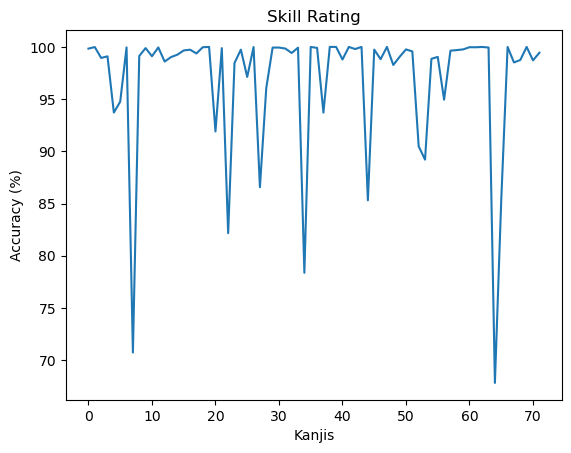

1/1 [==============================] - 0s 35ms/step
Predicted class: 14
Predicted class probability: 96.03619575500488 %
-----------------------------
U+4E8C
96.03619575500488
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

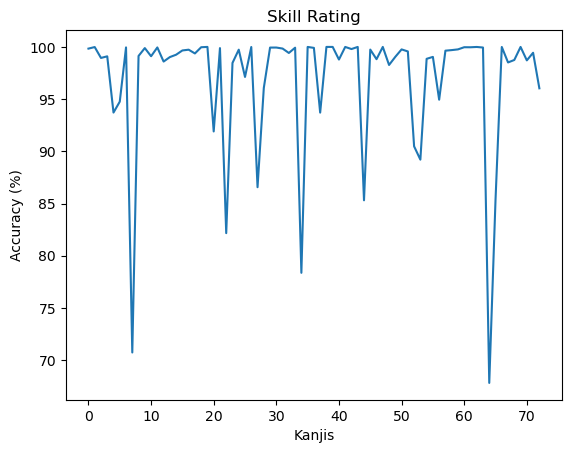

1/1 [==============================] - 0s 29ms/step
Predicted class: 12
Predicted class probability: 99.99713897705078 %
-----------------------------
U+4E5F
99.99713897705078
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

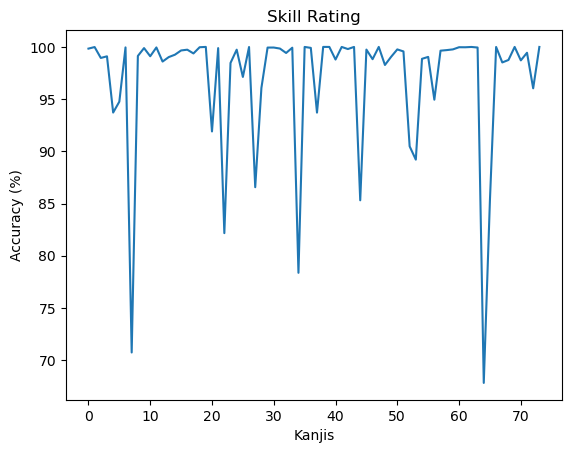

1/1 [==============================] - 0s 30ms/step
Predicted class: 17
Predicted class probability: 99.96851682662964 %
-----------------------------
U+4EAC
99.96851682662964
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

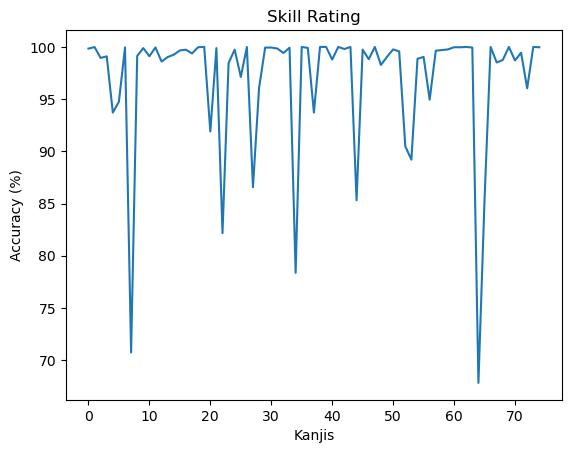

1/1 [==============================] - 0s 26ms/step
Predicted class: 0
Predicted class probability: 98.2058048248291 %
-----------------------------
U+4E00
98.2058048248291
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

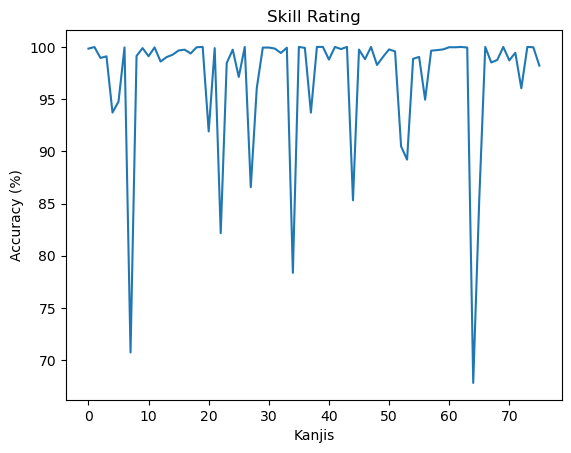

1/1 [==============================] - 0s 50ms/step
Predicted class: 0
Predicted class probability: 99.46172833442688 %
-----------------------------
U+4E00
99.46172833442688
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

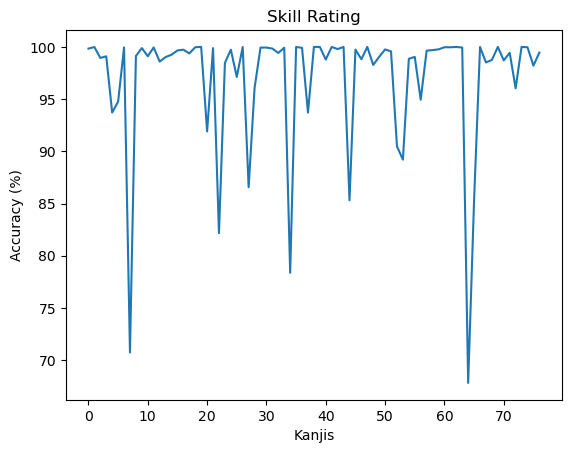

1/1 [==============================] - 0s 30ms/step
Predicted class: 9
Predicted class probability: 85.3082537651062 %
-----------------------------
U+4E3B
85.3082537651062
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

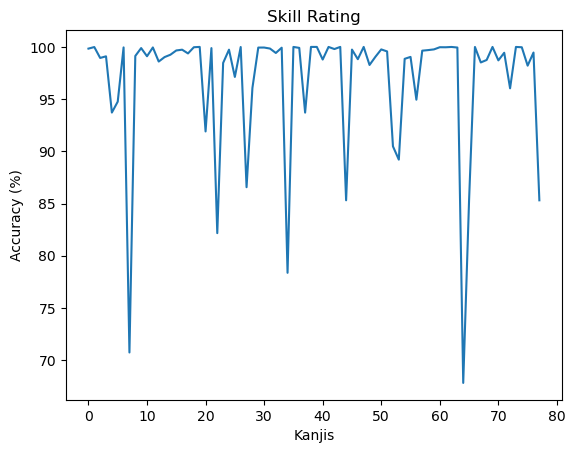

1/1 [==============================] - 0s 25ms/step
Predicted class: 3
Predicted class probability: 93.70802044868469 %
-----------------------------
U+4E09
93.70802044868469
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

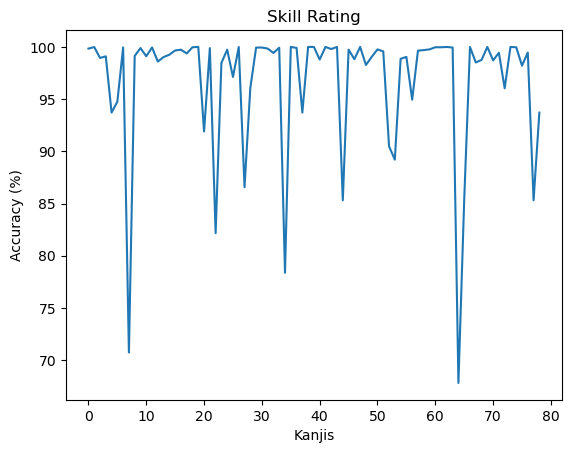

1/1 [==============================] - 0s 33ms/step
Predicted class: 14
Predicted class probability: 87.39882111549377 %
-----------------------------
U+4E8C
87.39882111549377
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

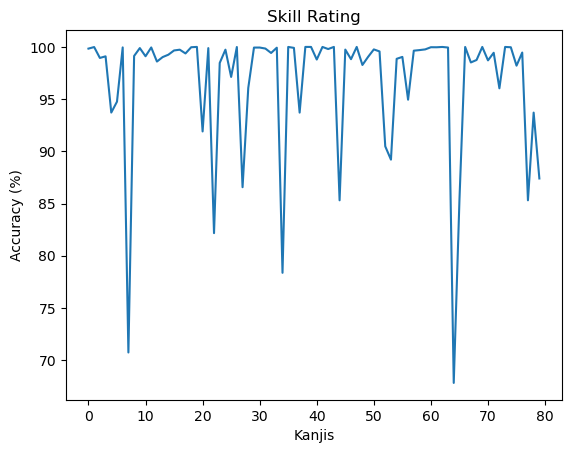

1/1 [==============================] - 0s 57ms/step
Predicted class: 4
Predicted class probability: 99.94509816169739 %
-----------------------------
U+4E0A
99.94509816169739
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

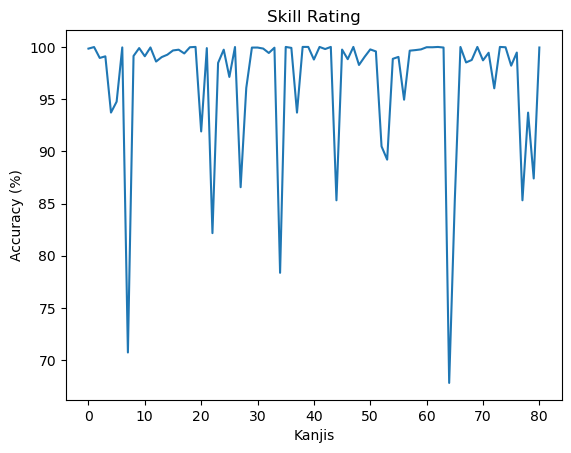

1/1 [==============================] - 0s 40ms/step
Predicted class: 3
Predicted class probability: 99.98315572738647 %
-----------------------------
U+4E09
99.98315572738647
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

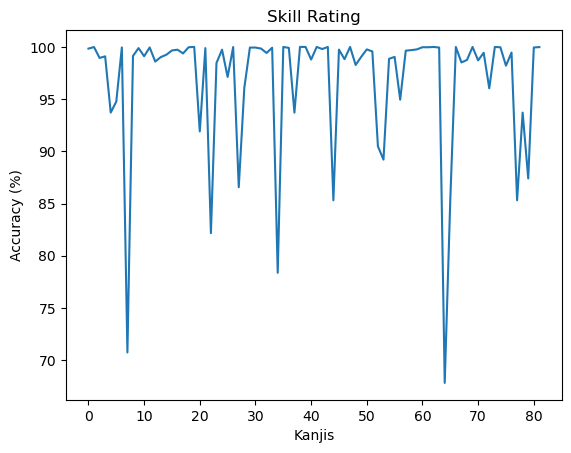

1/1 [==============================] - 0s 29ms/step
Predicted class: 8
Predicted class probability: 99.98024106025696 %
-----------------------------
U+4E2D
99.98024106025696
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

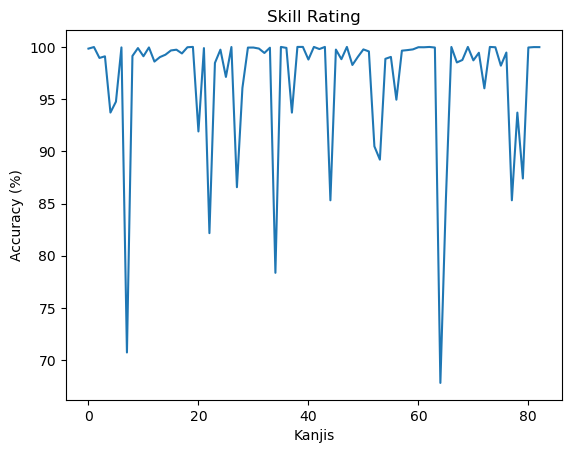

1/1 [==============================] - 0s 41ms/step
Predicted class: 13
Predicted class probability: 99.92321729660034 %
-----------------------------
U+4E8B
99.92321729660034
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

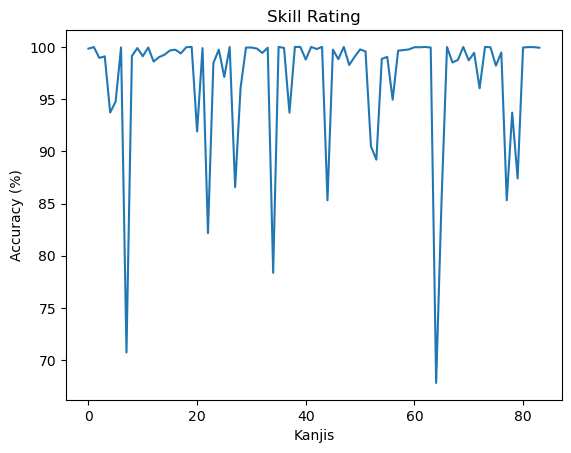

1/1 [==============================] - 0s 41ms/step
Predicted class: 3
Predicted class probability: 99.84025359153748 %
-----------------------------
U+4E09
99.84025359153748
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

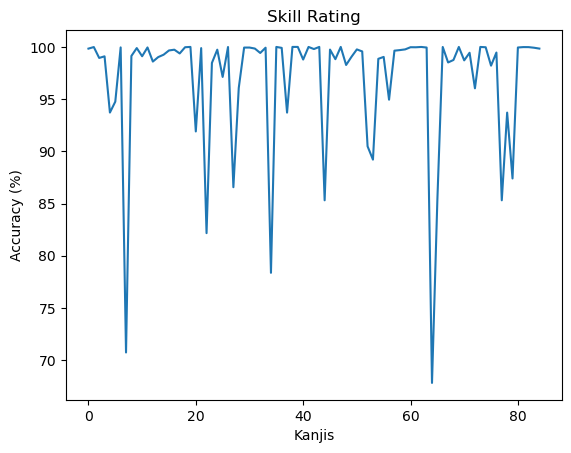

1/1 [==============================] - 0s 50ms/step
Predicted class: 2
Predicted class probability: 99.75047707557678 %
-----------------------------
U+4E07
99.75047707557678
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

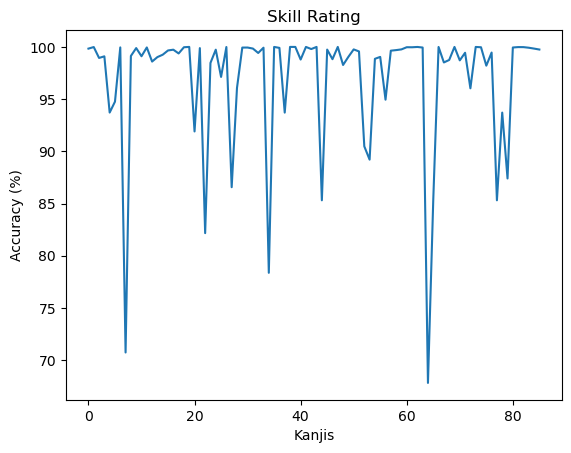

1/1 [==============================] - 0s 45ms/step
Predicted class: 18
Predicted class probability: 99.99948740005493 %
-----------------------------
U+4EBA
99.99948740005493
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

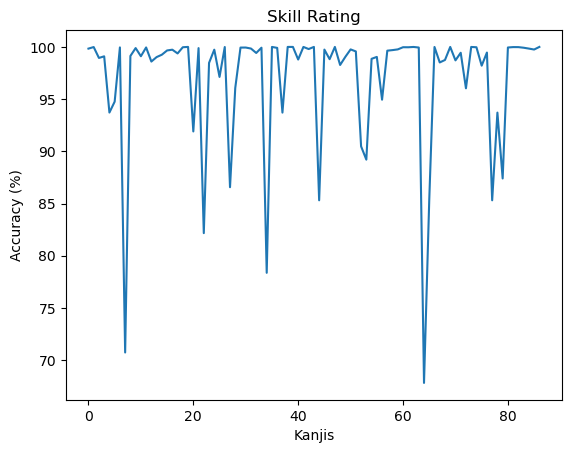

1/1 [==============================] - 0s 43ms/step
Predicted class: 0
Predicted class probability: 99.429190158844 %
-----------------------------
U+4E00
99.429190158844
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646

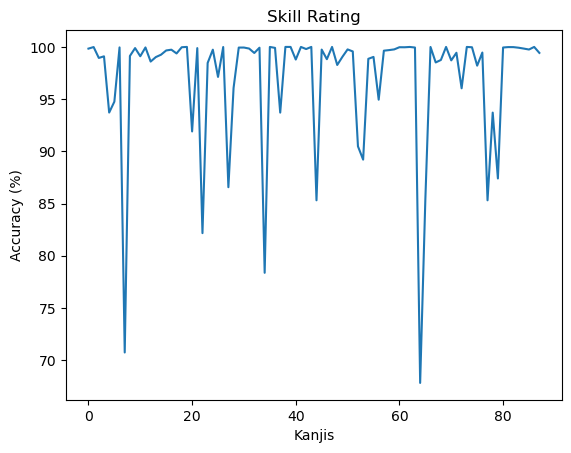

1/1 [==============================] - 0s 66ms/step
Predicted class: 1
Predicted class probability: 99.73588585853577 %
-----------------------------
U+4E03
99.73588585853577
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

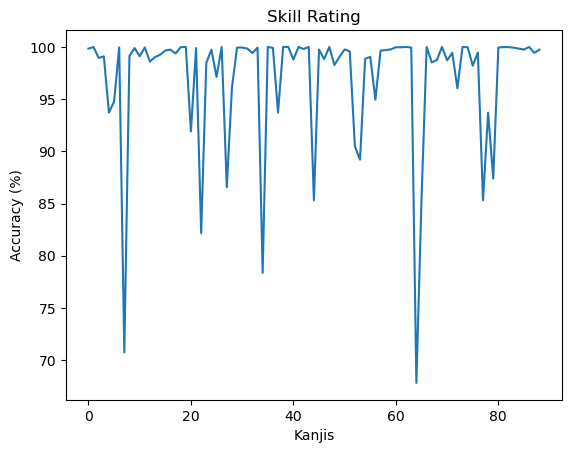

1/1 [==============================] - 0s 54ms/step
Predicted class: 5
Predicted class probability: 99.6723473072052 %
-----------------------------
U+4E0B
99.6723473072052
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

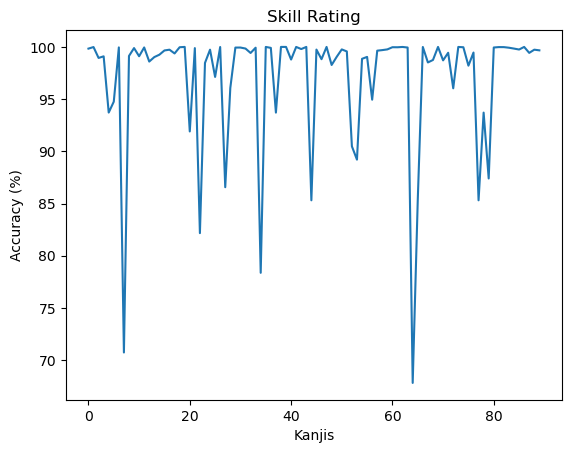

1/1 [==============================] - 0s 42ms/step
Predicted class: 15
Predicted class probability: 99.81279969215393 %
-----------------------------
U+4E91
99.81279969215393
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

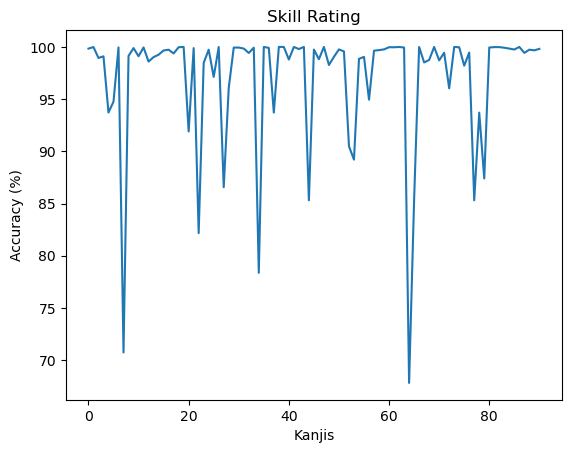

1/1 [==============================] - 0s 80ms/step
Predicted class: 0
Predicted class probability: 99.8465895652771 %
-----------------------------
U+4E00
99.8465895652771
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56276

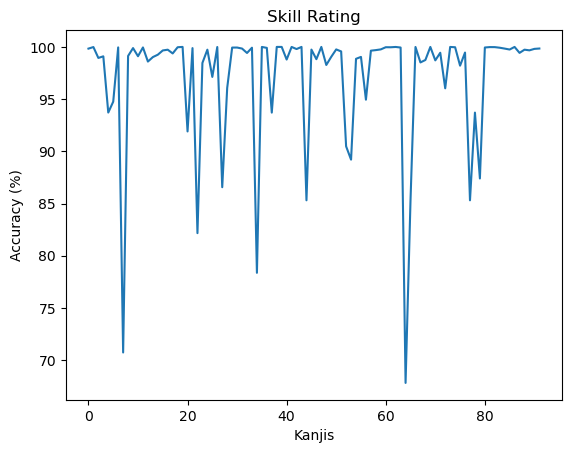

1/1 [==============================] - 0s 53ms/step
Predicted class: 18
Predicted class probability: 99.14717078208923 %
-----------------------------
U+4EBA
99.14717078208923
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

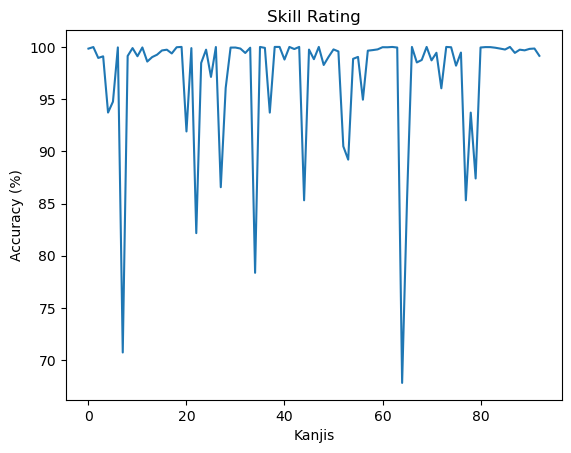

1/1 [==============================] - 0s 46ms/step
Predicted class: 7
Predicted class probability: 99.99324083328247 %
-----------------------------
U+4E16
99.99324083328247
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

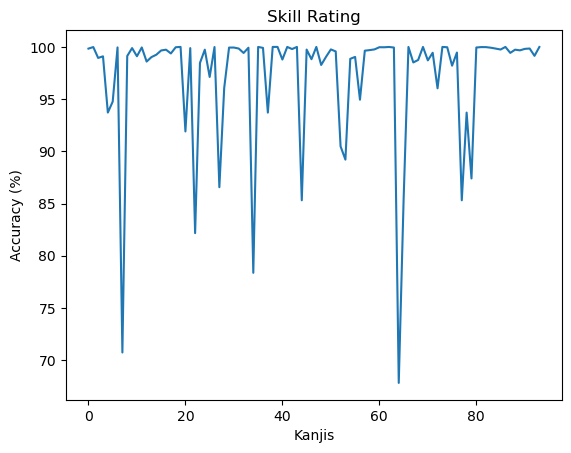

1/1 [==============================] - 0s 44ms/step
Predicted class: 15
Predicted class probability: 99.99780654907227 %
-----------------------------
U+4E91
99.99780654907227
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

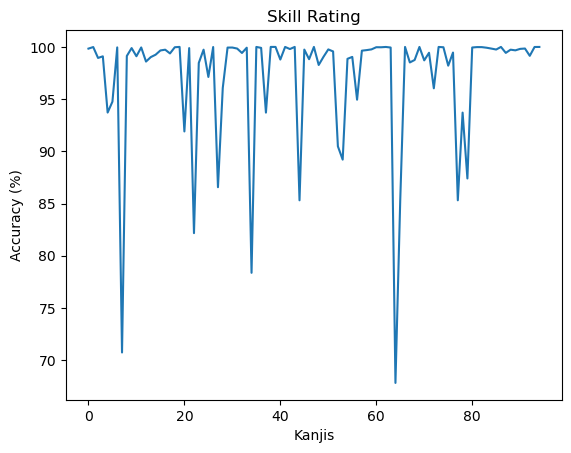

1/1 [==============================] - 0s 26ms/step
Predicted class: 3
Predicted class probability: 99.92269277572632 %
-----------------------------
U+4E09
99.92269277572632
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

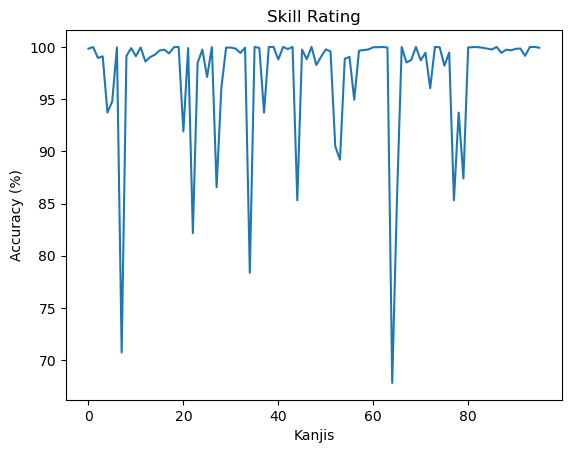

1/1 [==============================] - 0s 39ms/step
Predicted class: 0
Predicted class probability: 99.86238479614258 %
-----------------------------
U+4E00
99.86238479614258
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

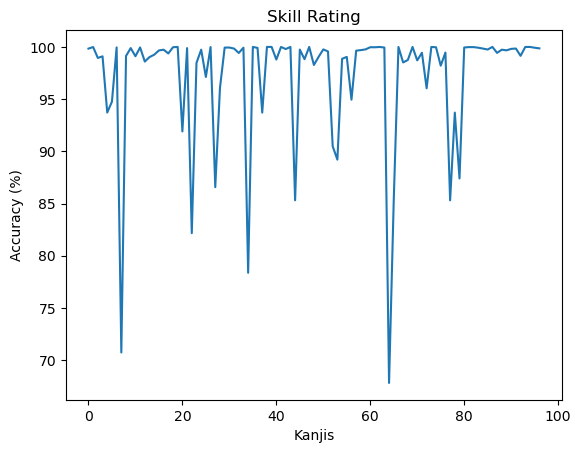

1/1 [==============================] - 0s 38ms/step
Predicted class: 0
Predicted class probability: 99.89055395126343 %
-----------------------------
U+4E00
99.89055395126343
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

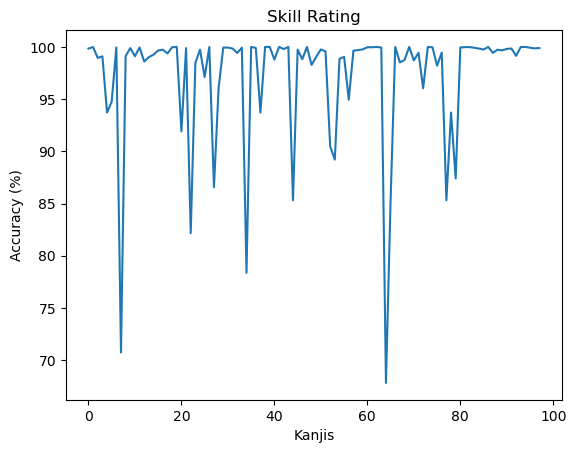

1/1 [==============================] - 0s 26ms/step
Predicted class: 15
Predicted class probability: 99.99701976776123 %
-----------------------------
U+4E91
99.99701976776123
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.56

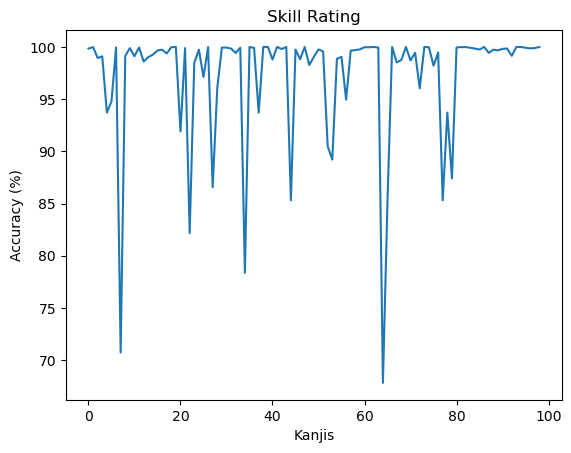

1/1 [==============================] - 0s 32ms/step
Predicted class: 0
Predicted class probability: 99.85176920890808 %
-----------------------------
U+4E00
99.85176920890808
-----------------------------
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.562

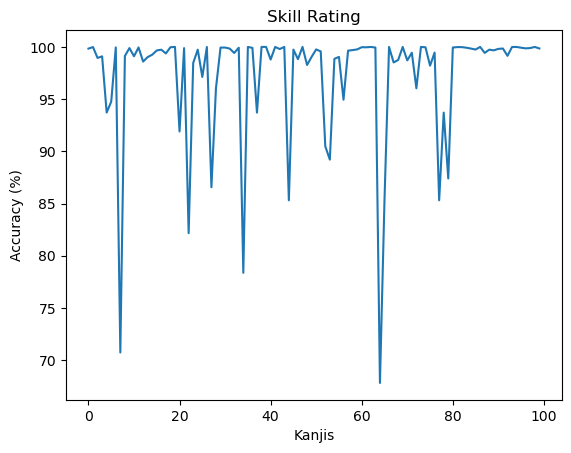

In [19]:
from matplotlib import pyplot
import random

accuracy_history = []
accuracy_history_img = []
predicted_class_index_list = [] 

for _ in range(100):
    image_number = random.randint(0, len(x_test) - 1)
    new_image = tf.expand_dims(x_test[image_number], 0)
    predictions = model.predict(new_image)
    predicted_class_index = predictions.argmax(axis=-1)[0]
    predicted_class_probability = predictions[0][predicted_class_index]
    print('Predicted class:', predicted_class_index)
    print('Predicted class probability:', predicted_class_probability * 100, "%")

    print("-----------------------------")
    print(np.unique(Z)[predicted_class_index])
    print(predicted_class_probability * 100)
    print("-----------------------------")

    accuracyHistory.save_and_display_accuracy(np.unique(Z)[predicted_class_index], predicted_class_probability * 100)
    accuracy_history_img.append(image_number)
    predicted_class_index_list.append(predicted_class_index)

    # pyplot.imshow(x_test[image_number], cmap='Greys')
    # pyplot.show()


('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F', 99.94081258773804, 'U+4E91', 99.84297156333923, 'U+4E09', 99.42044615745544, 'U+4E8B', 99.92592930793762, 'U+4E00', 78.362655

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


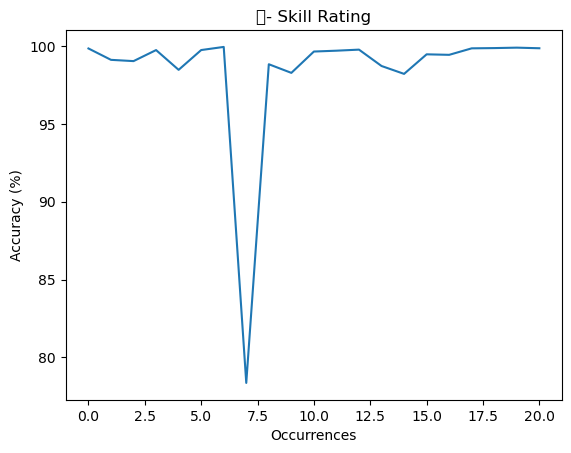

In [20]:
accuracyHistory.display_kanji_accuracy('U+4E00')

In [21]:

# print(accuracy_history)
# plt.plot(accuracy_history)
# plt.title('Skill Rating')
# plt.ylabel('Accuracy (%)')
# plt.xlabel('Attempts')
# plt.show()